## **Mental Health Survey Analysis**
-----
This notebook analyzes data from a survey on the quality of mental health services in Iran. 

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
import itertools
from pywaffle import Waffle

In [63]:
from utils import (
    set_plot_style,
    load_data,
    plot_parallel_coordinates,
    test_barrier_association,
    treatment_label_map,
    illness_related_cols,
    treatment_related_cols,
    event_related_cols,
    illness_stigma_cols,
    illness_personal_cols,
    illness_impact_map,
    diagnosis_map,
    event_map,
    barrier_groups,
)

set_plot_style()
stigma = load_data("./clean_dataset_may08.csv")

In [64]:
barriers = stigma[treatment_related_cols]
co_occurrence = (barriers.T @ barriers) / len(barriers) * 100
illness_impact_groupedby_diagnosis = (
    stigma.groupby("diagnosis")[illness_related_cols].mean() * 100
).reset_index()
impact_by_dx = illness_impact_groupedby_diagnosis.T.reset_index()
impact_by_dx.columns = impact_by_dx.iloc[0]
impact_by_dx = impact_by_dx[1:].reset_index(drop=True)


### **Participant Demographics**

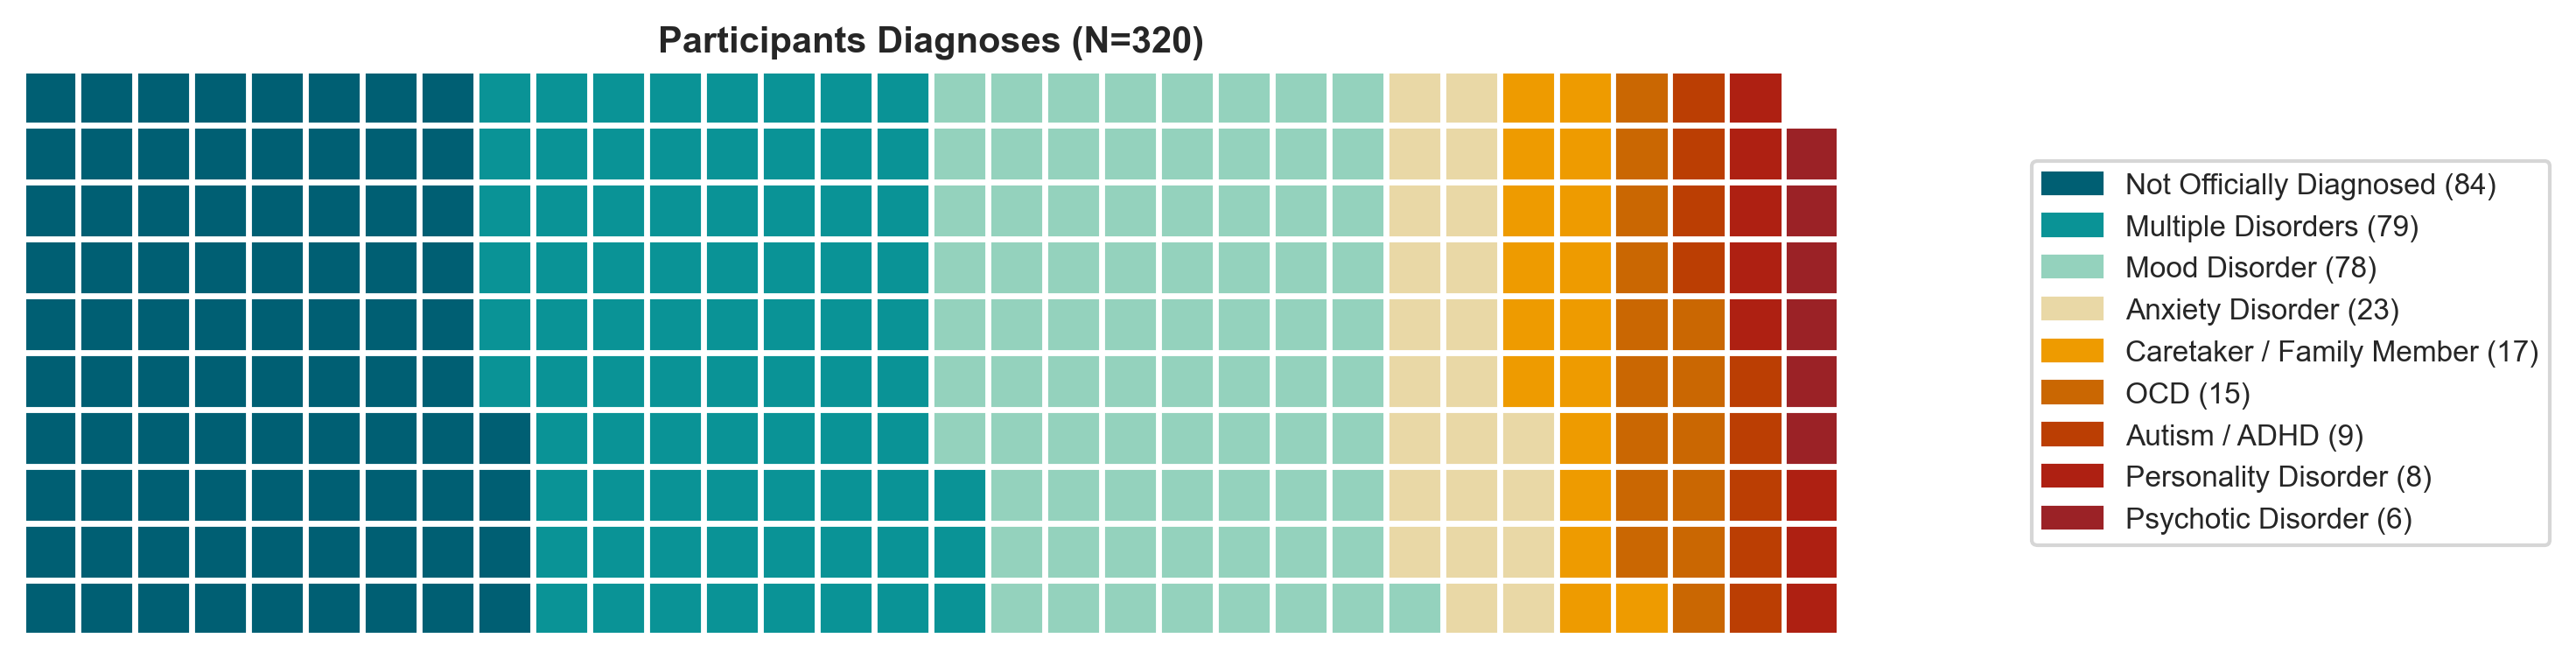

In [ ]:
diagnosis_counts = stigma["diagnosis"].value_counts()
data = {
    diagnosis_map.get(label, label): count for label, count in diagnosis_counts.items()
}

custom_colors = [
    "#005f73",
    "#0a9396",
    "#94d2bd",
    "#e9d8a6",
    "#ee9b00",
    "#ca6702",
    "#bb3e03",
    "#ae2012",
    "#9b2226",
]

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=data,
    title={
        "label": "Participants Diagnoses (N=320)",
        "loc": "center",
        "fontsize": 10,
        "fontweight": "bold",
    },
    labels=[f"{label} ({count})" for label, count in data.items()],
    legend={"loc": "center left", "bbox_to_anchor": (1.1, 0.5), "fontsize": 8},
    figsize=(10, 6),
    colors=custom_colors[: len(data)],
)
plt.tight_layout()
plt.show()


### **How Does Living with a Mental Illness Affect Participants?** 

In [ ]:
illness_impact_percentages = stigma[illness_related_cols].mean() * 100
illness_impact_percentages = pd.DataFrame(
    {
        "impact of illness": illness_impact_percentages.index,
        "percentage of total participants": illness_impact_percentages.values,
    }
).sort_values(by="percentage of total participants", ascending=False)

/var/folders/th/j8z2dhq93093fldk111x3r500000gn/T/ipykernel_24432/3113178839.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


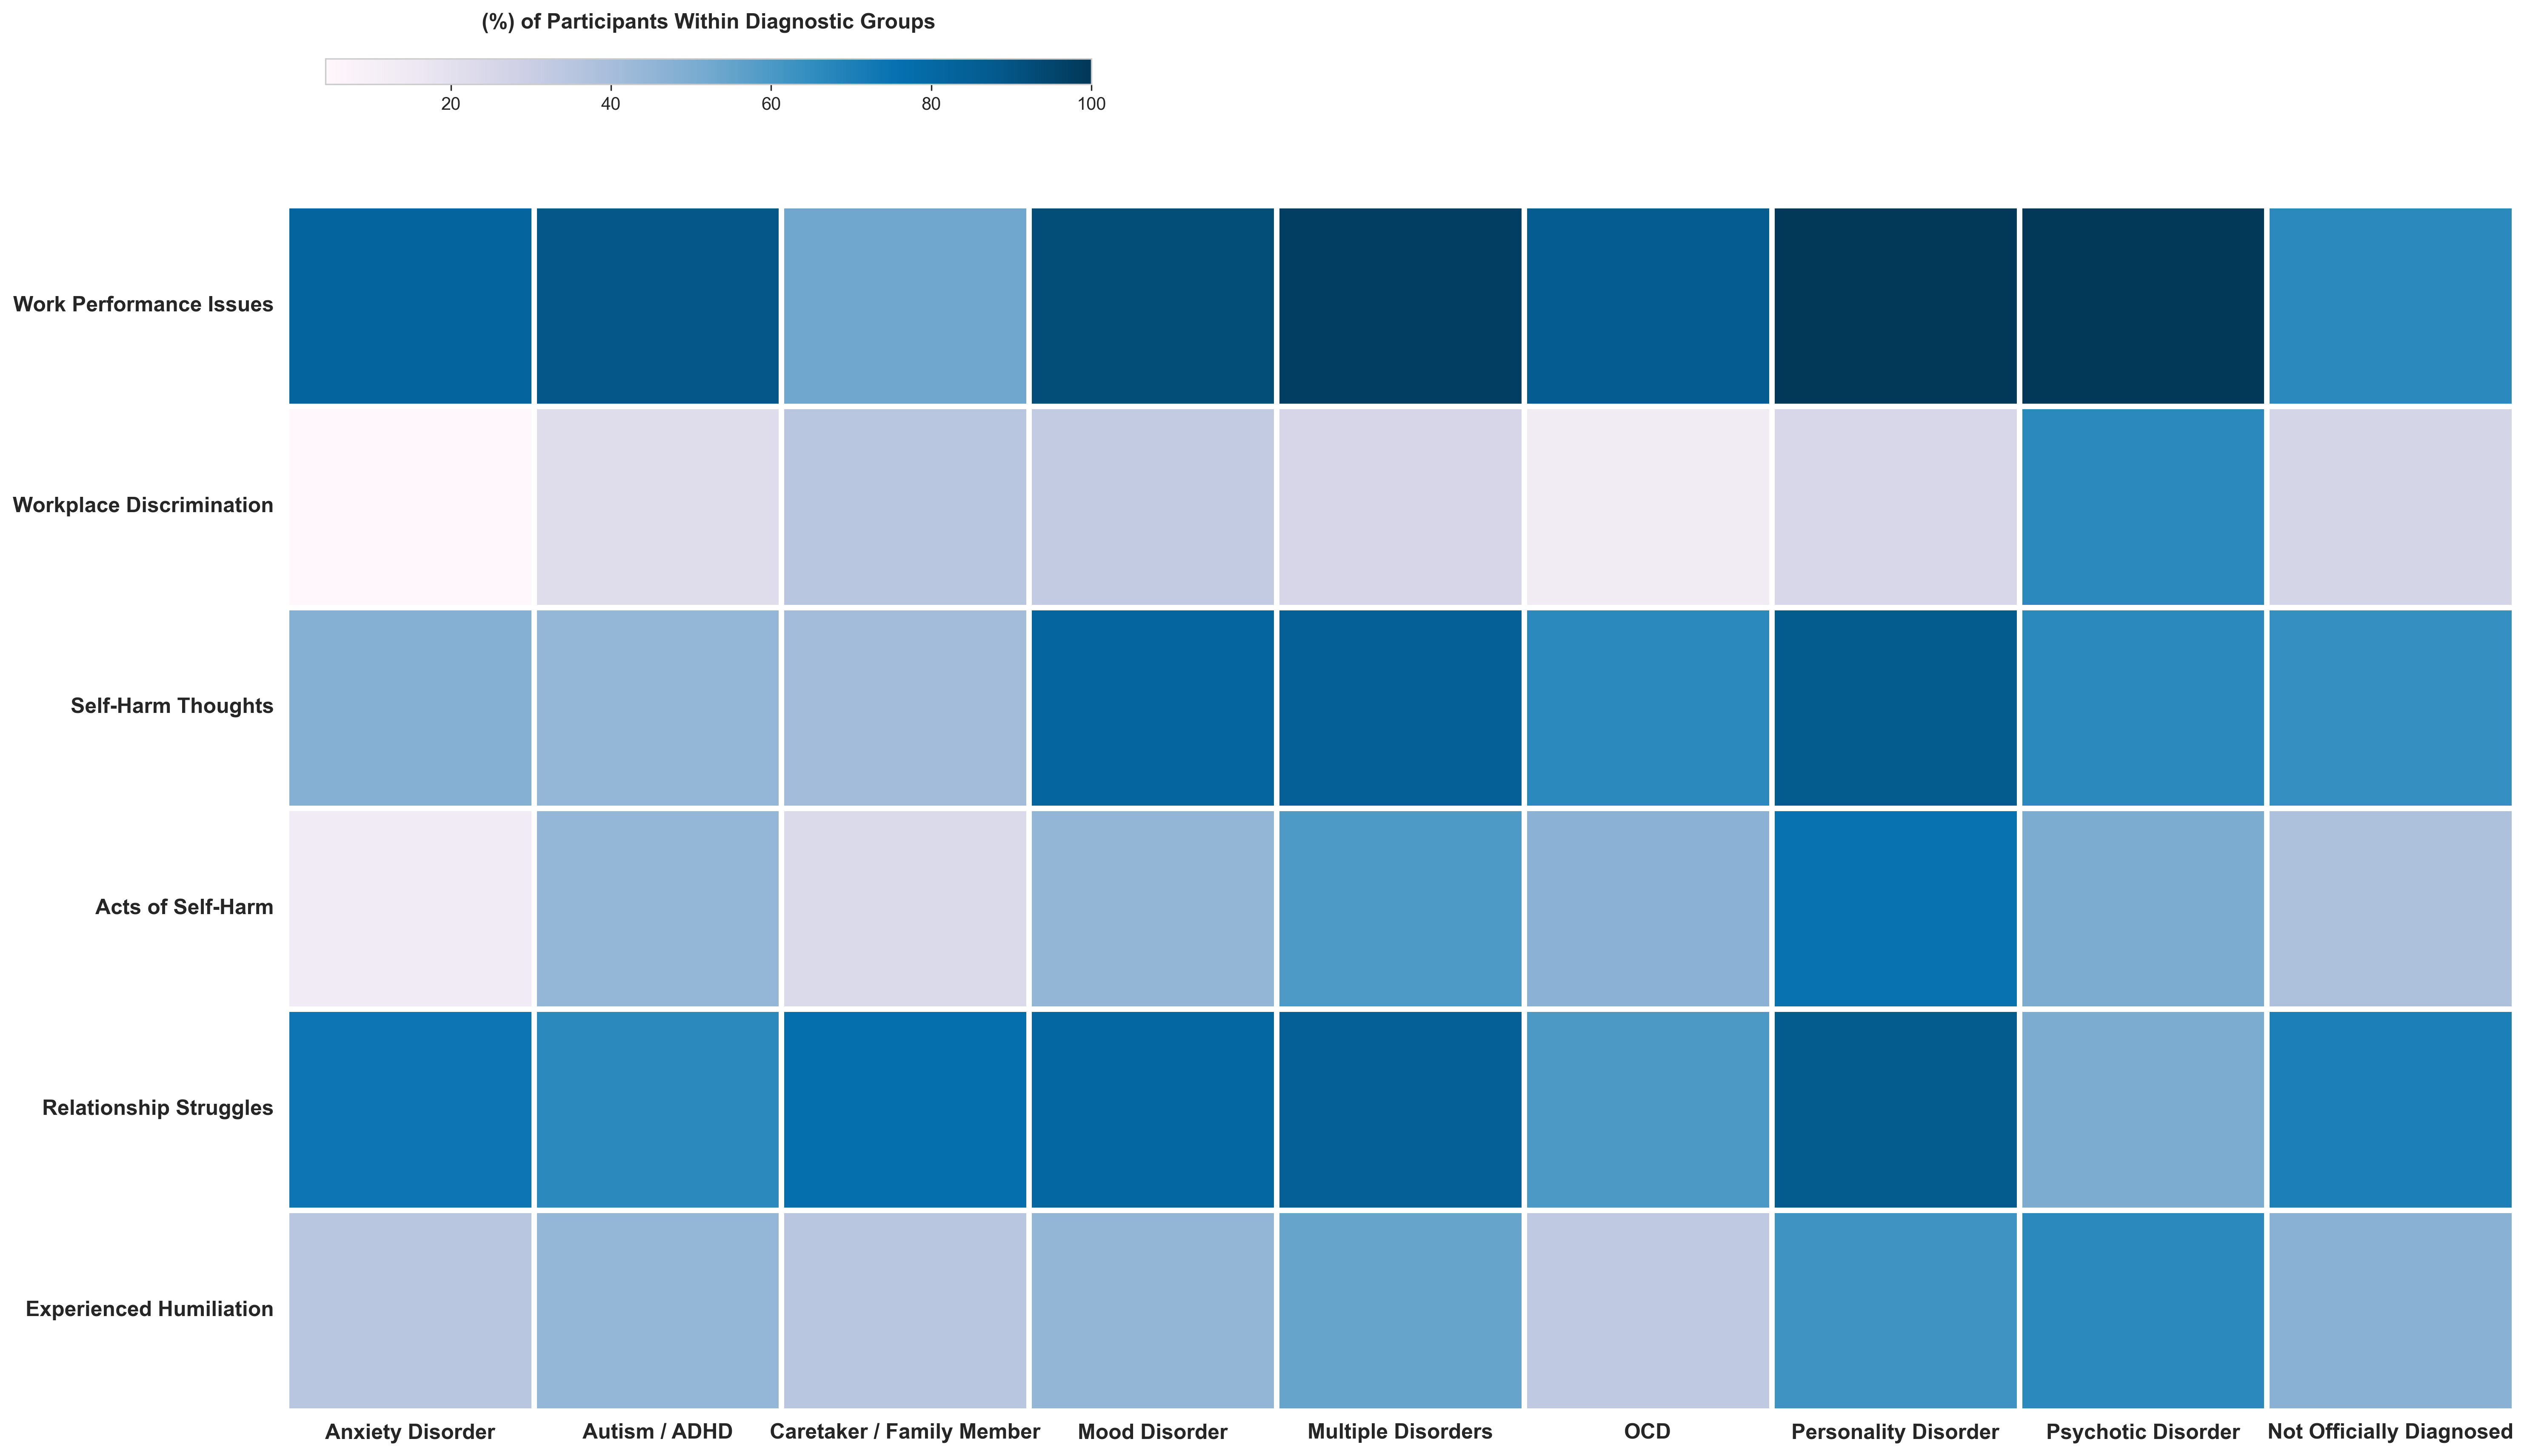

In [ ]:
impact_heatmap = impact_by_dx.set_index("diagnosis")
impact_labels = [illness_impact_map.get(idx, idx) for idx in impact_heatmap.index]
diagnosis_labels = [diagnosis_map.get(col, col) for col in impact_heatmap.columns]

fig, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(
    impact_heatmap.astype(float),
    annot=False,
    cmap="PuBu",
    linewidths=3,
    linecolor="White",
    xticklabels=diagnosis_labels,
    yticklabels=impact_labels,
    cbar=False,
    ax=ax,
)

plt.xticks(rotation=0, fontweight="bold", fontsize=12)
plt.yticks(fontweight="bold", fontsize=12)
plt.ylabel("")
plt.xlabel("")
cbar_ax = fig.add_axes([0.13, 1.08, 0.30, 0.02])
cbar = plt.colorbar(ax.collections[0], cax=cbar_ax, orientation="horizontal")
cbar_ax.text(
    0.5,
    2,
    "(%) of Participants Within Diagnostic Groups",
    transform=cbar_ax.transAxes,
    fontsize=12,
    fontweight="bold",
    ha="center",
    va="bottom",
)

plt.title("")
plt.tight_layout()
plt.show()


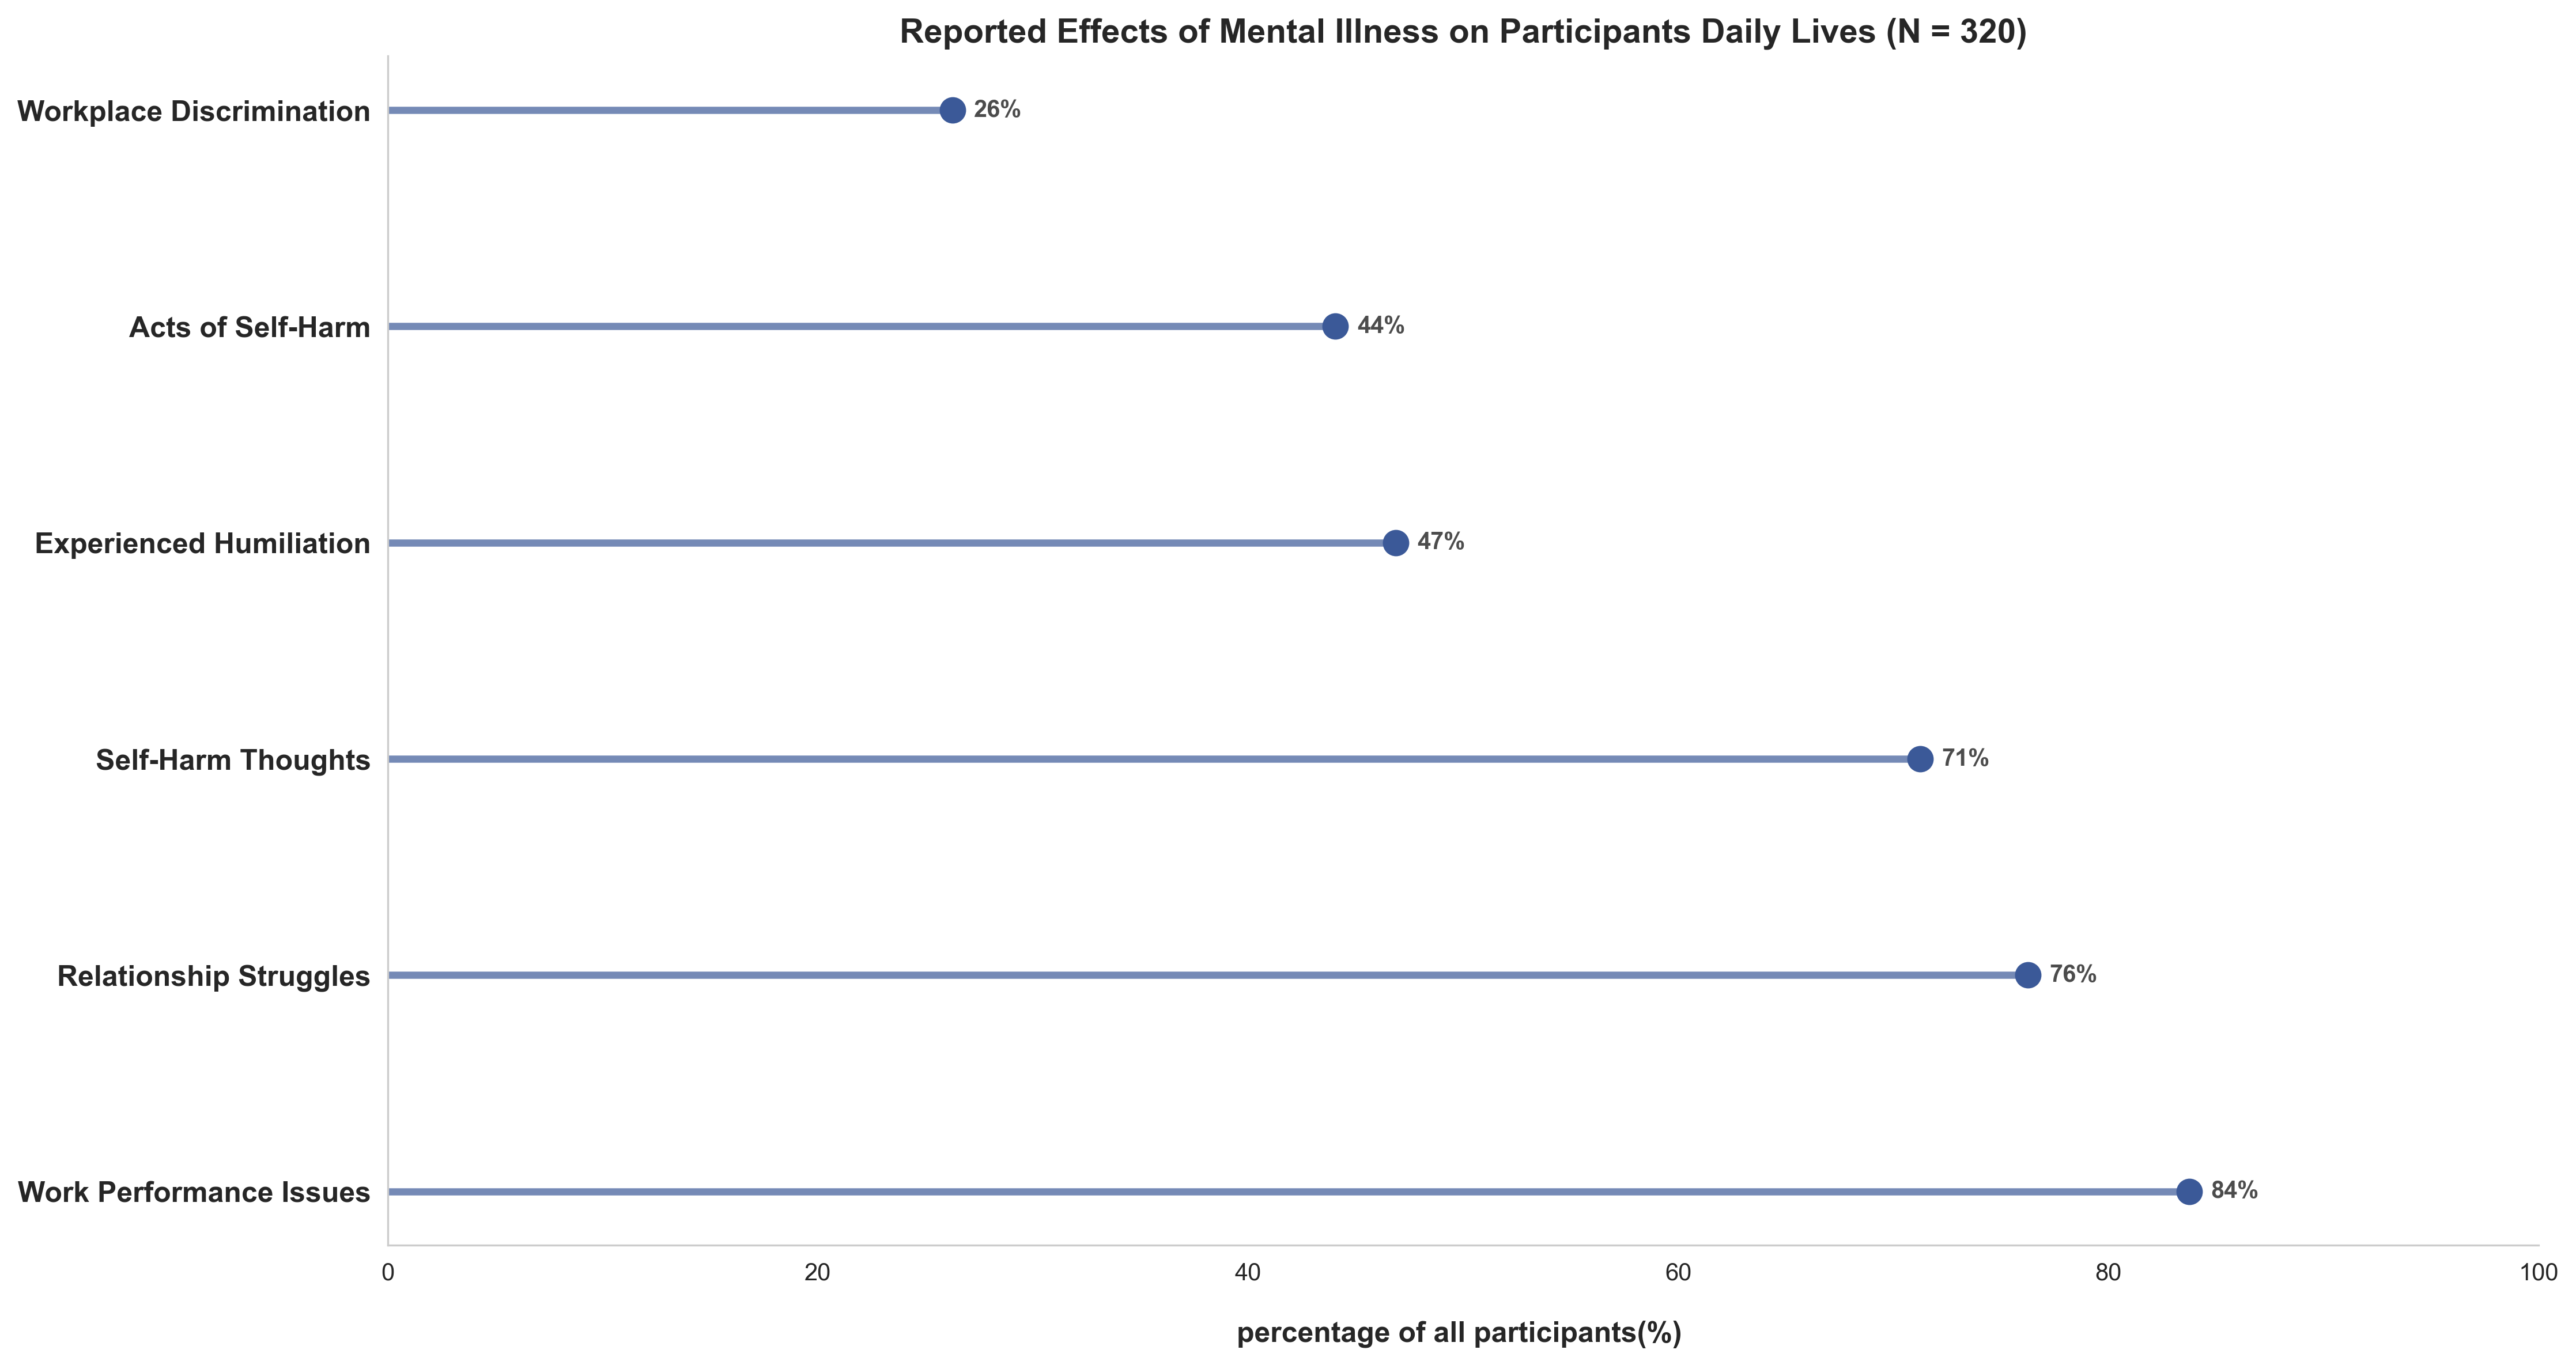

In [ ]:
y_labels = illness_impact_percentages["impact of illness"].map(illness_impact_map)
y_pos = np.arange(len(illness_impact_percentages))

fig, ax = plt.subplots(figsize=(15, 8))
ax.hlines(
    y=y_pos,
    xmin=0,
    xmax=illness_impact_percentages["percentage of total participants"],
    color="#3B5998",
    alpha=0.7,
    linewidth=3,
)
ax.plot(
    illness_impact_percentages["percentage of total participants"],
    y_pos,
    "o",
    markersize=10,
    color="#3B5998",
)

for index in range(len(illness_impact_percentages)):
    x_value = illness_impact_percentages["percentage of total participants"].iloc[index]
    y_position = y_pos[index]

    ax.text(
        x_value + 1,
        y_position,
        f"{x_value:.0f}%",
        va="center",
        fontsize=10,
        fontweight="bold",
        color="black",
        alpha=0.7,
    )

ax.set_yticks(y_pos)
ax.set_yticklabels(y_labels, fontweight="bold", fontsize=12)
ax.set_xlabel(
    "percentage of all participants(%) ", fontsize=12, fontweight="bold", labelpad=15
)
ax.set_ylabel("")
ax.set_title(
    "Reported Effects of Mental Illness on Participants Daily Lives (N = 320)",
    fontweight="bold",
    fontsize=14,
)
ax.grid(visible=False)
ax.set_xlim(0, 100)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

### **How does the reported impact of mental illness differ across Diagnostic Groups?**


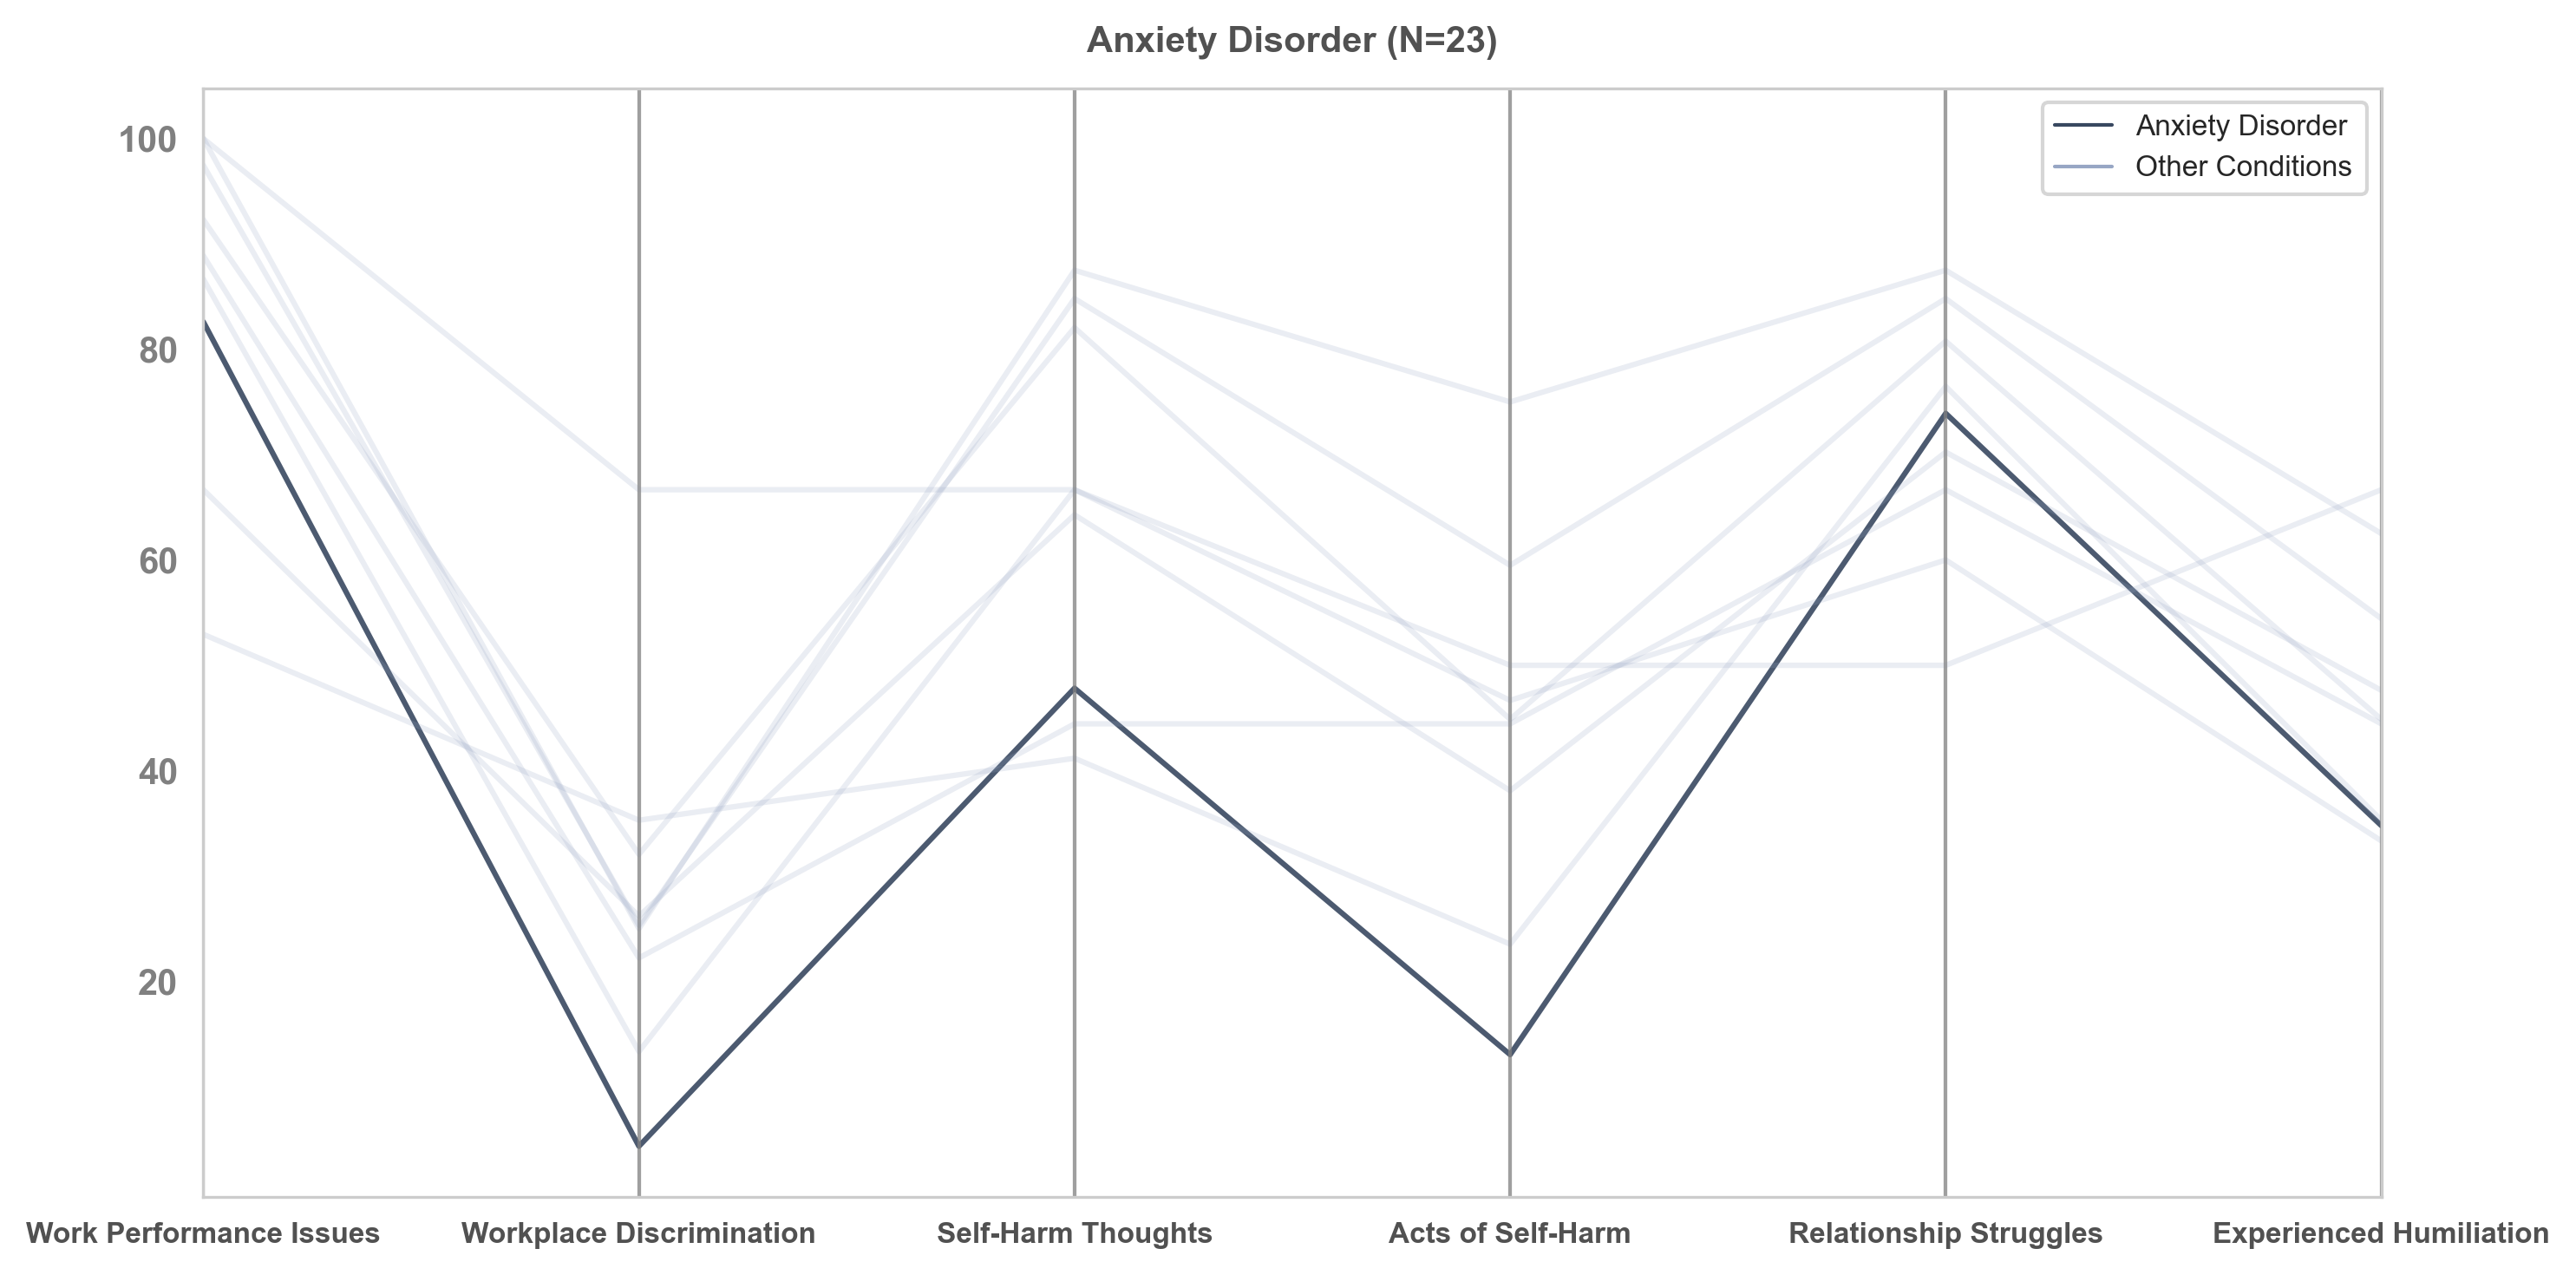

In [69]:
plot_parallel_coordinates(illness_impact_groupedby_diagnosis, "anxiety_disorder", 23)

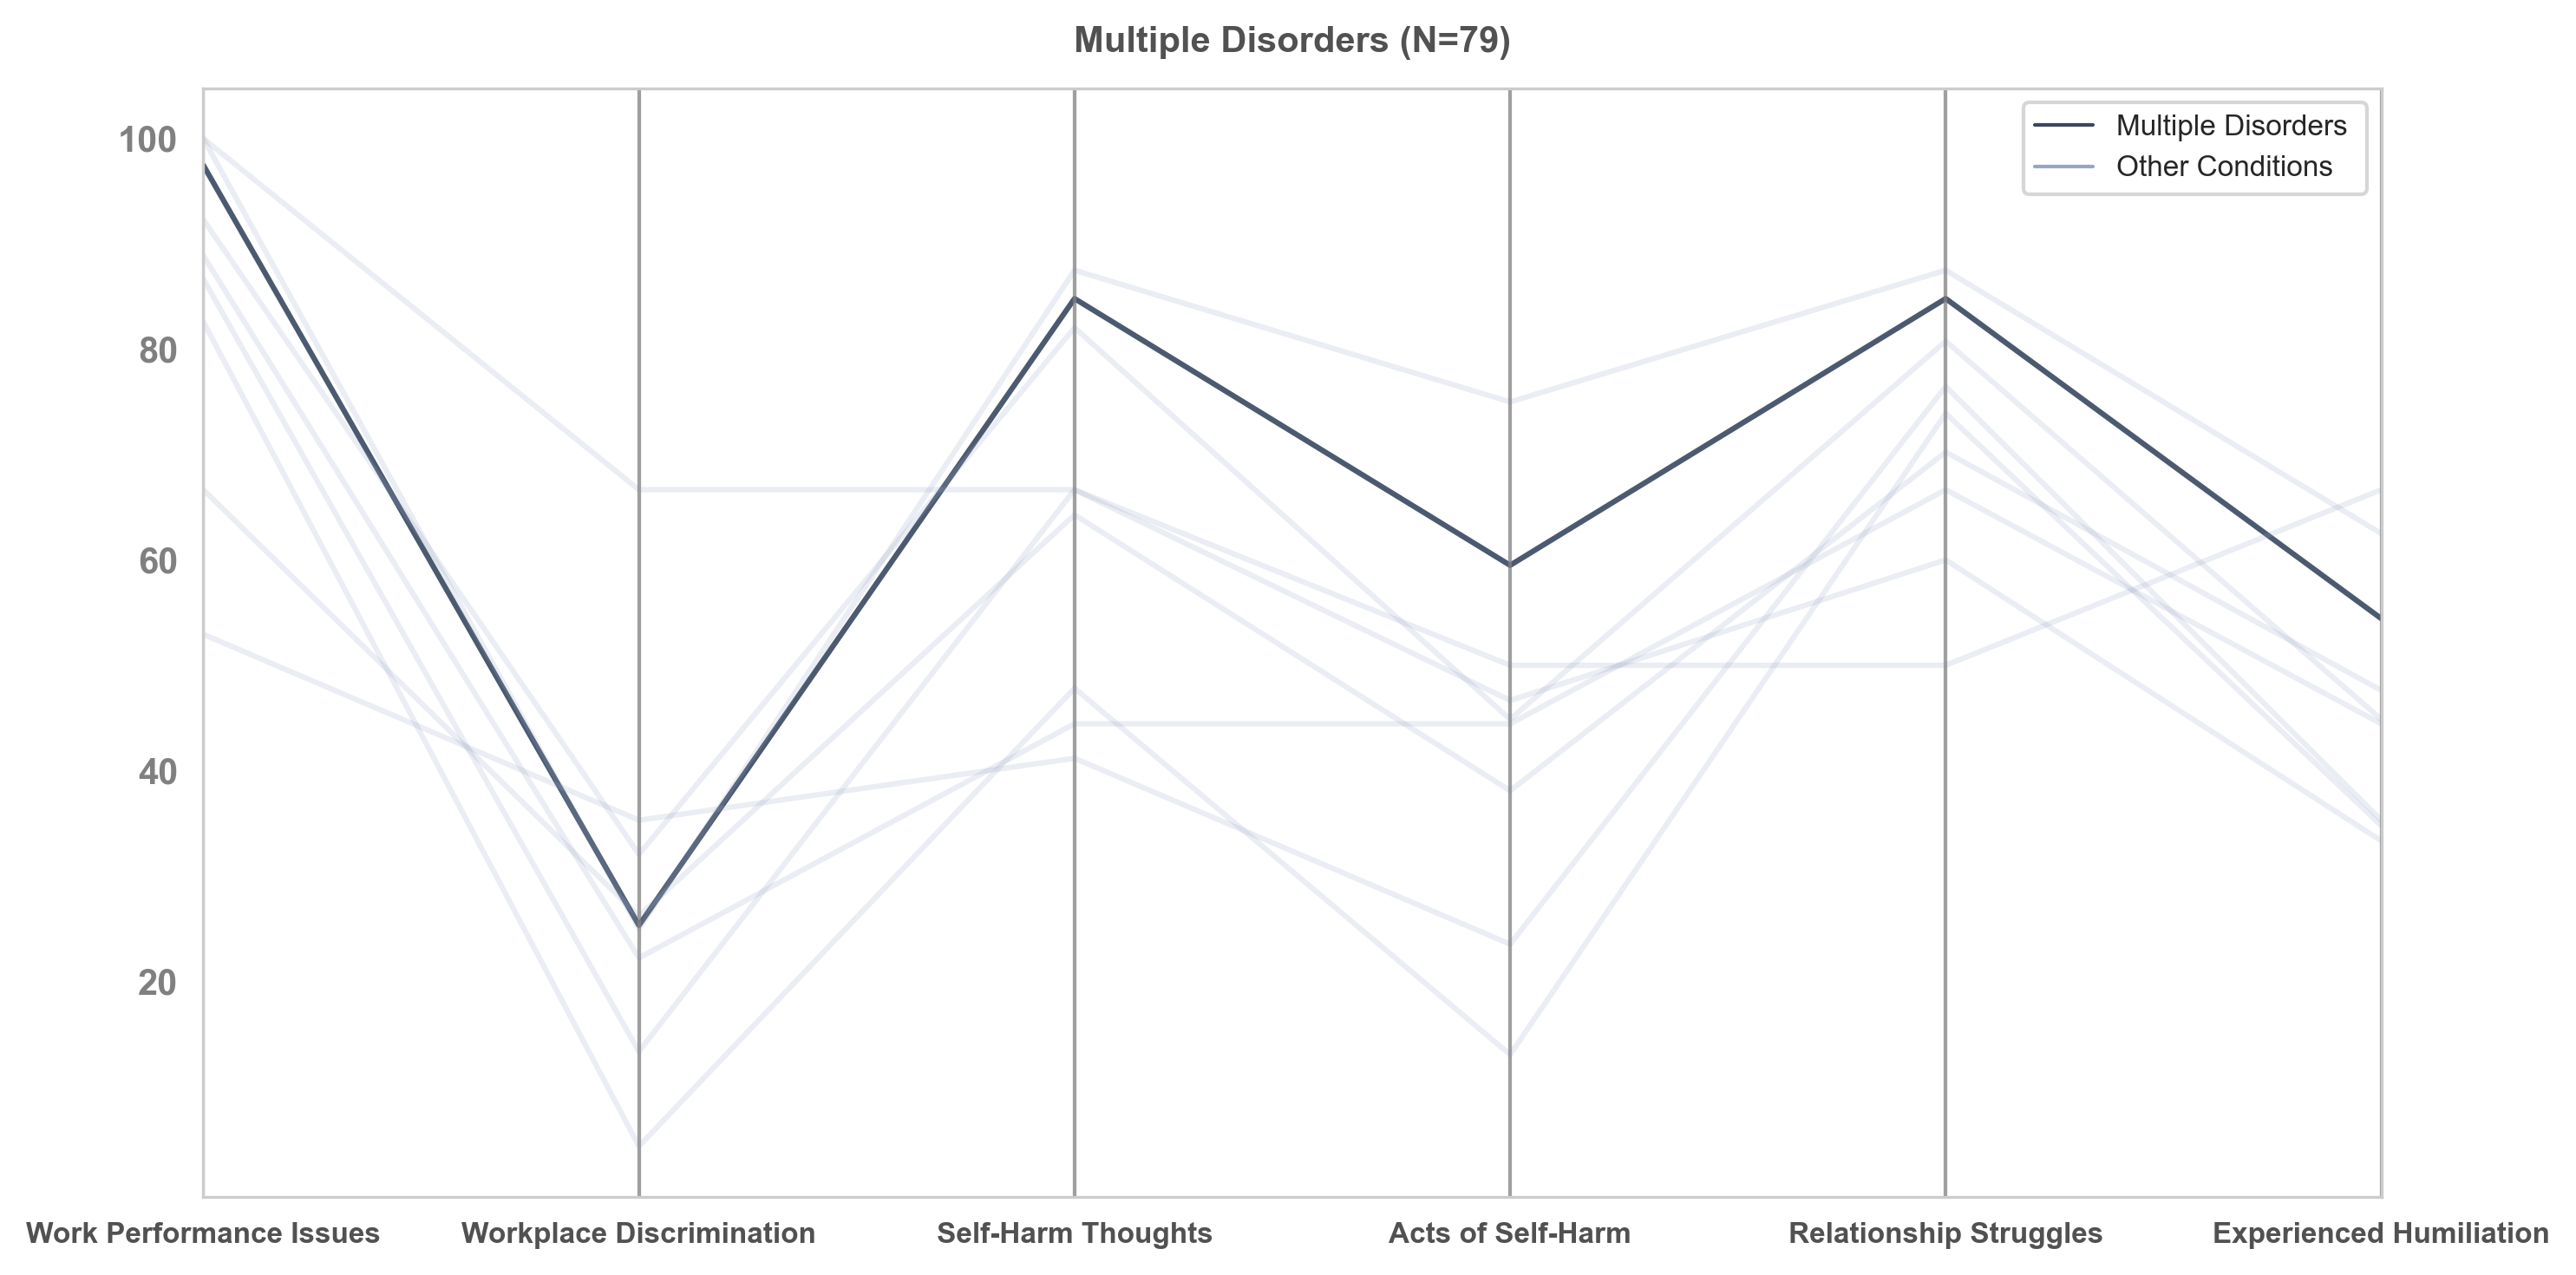

In [70]:
plot_parallel_coordinates(illness_impact_groupedby_diagnosis, "multiple", 79)

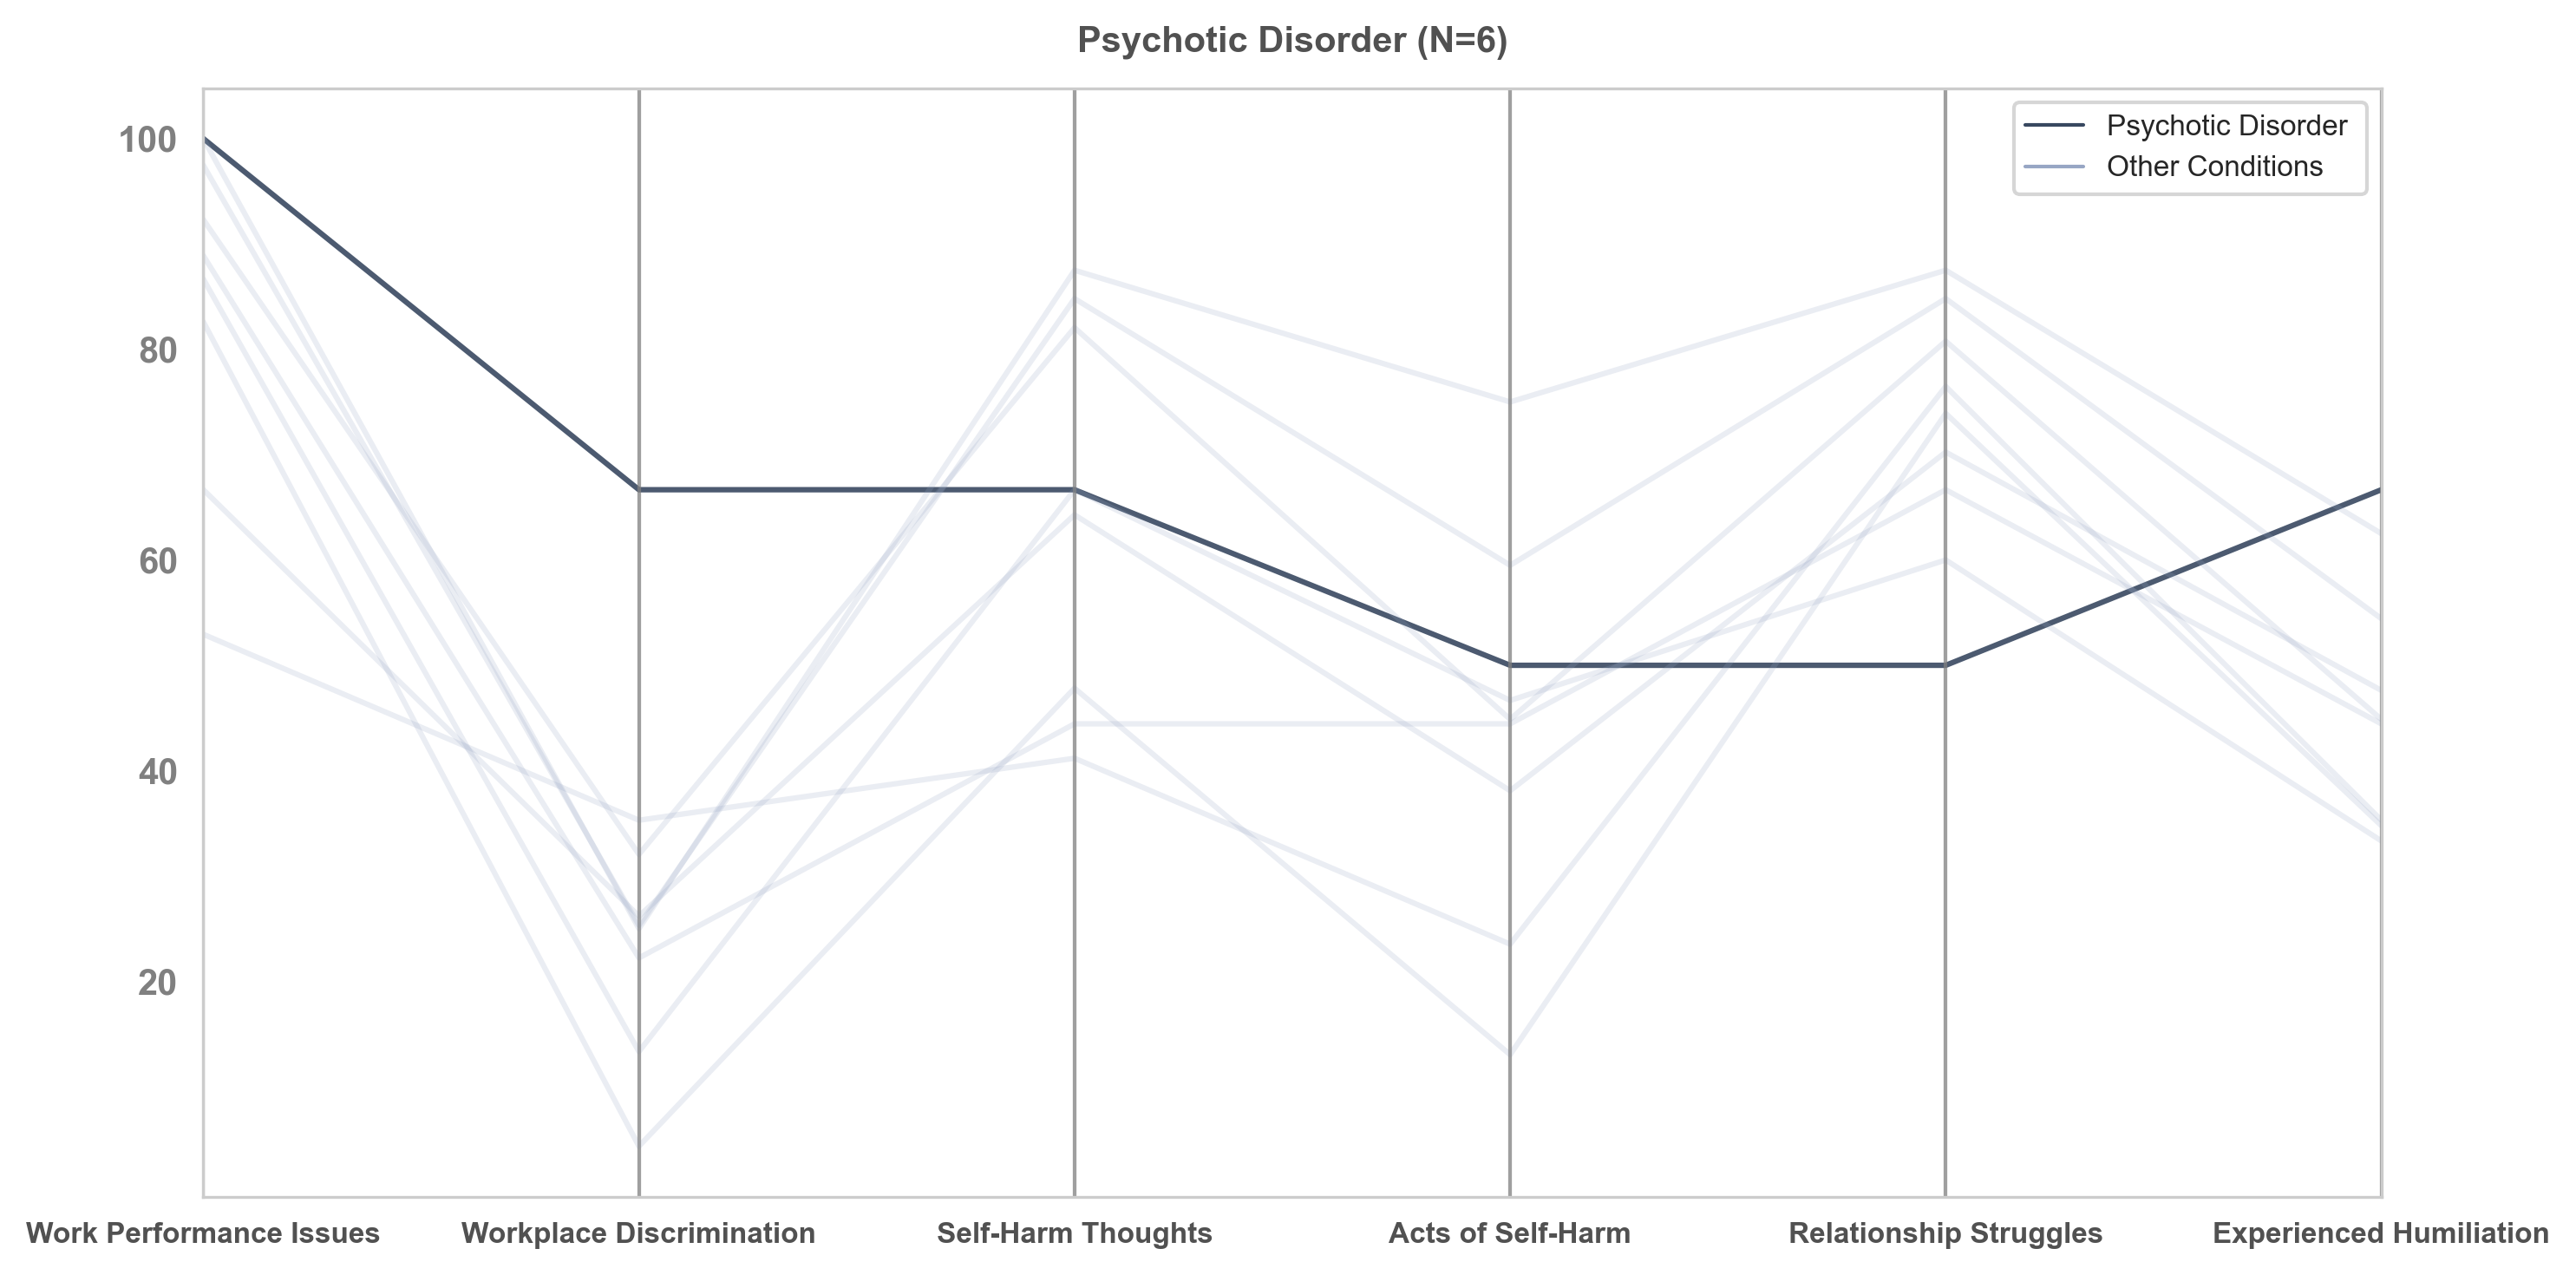

In [71]:
plot_parallel_coordinates(illness_impact_groupedby_diagnosis, "psychotic_illness", 6)

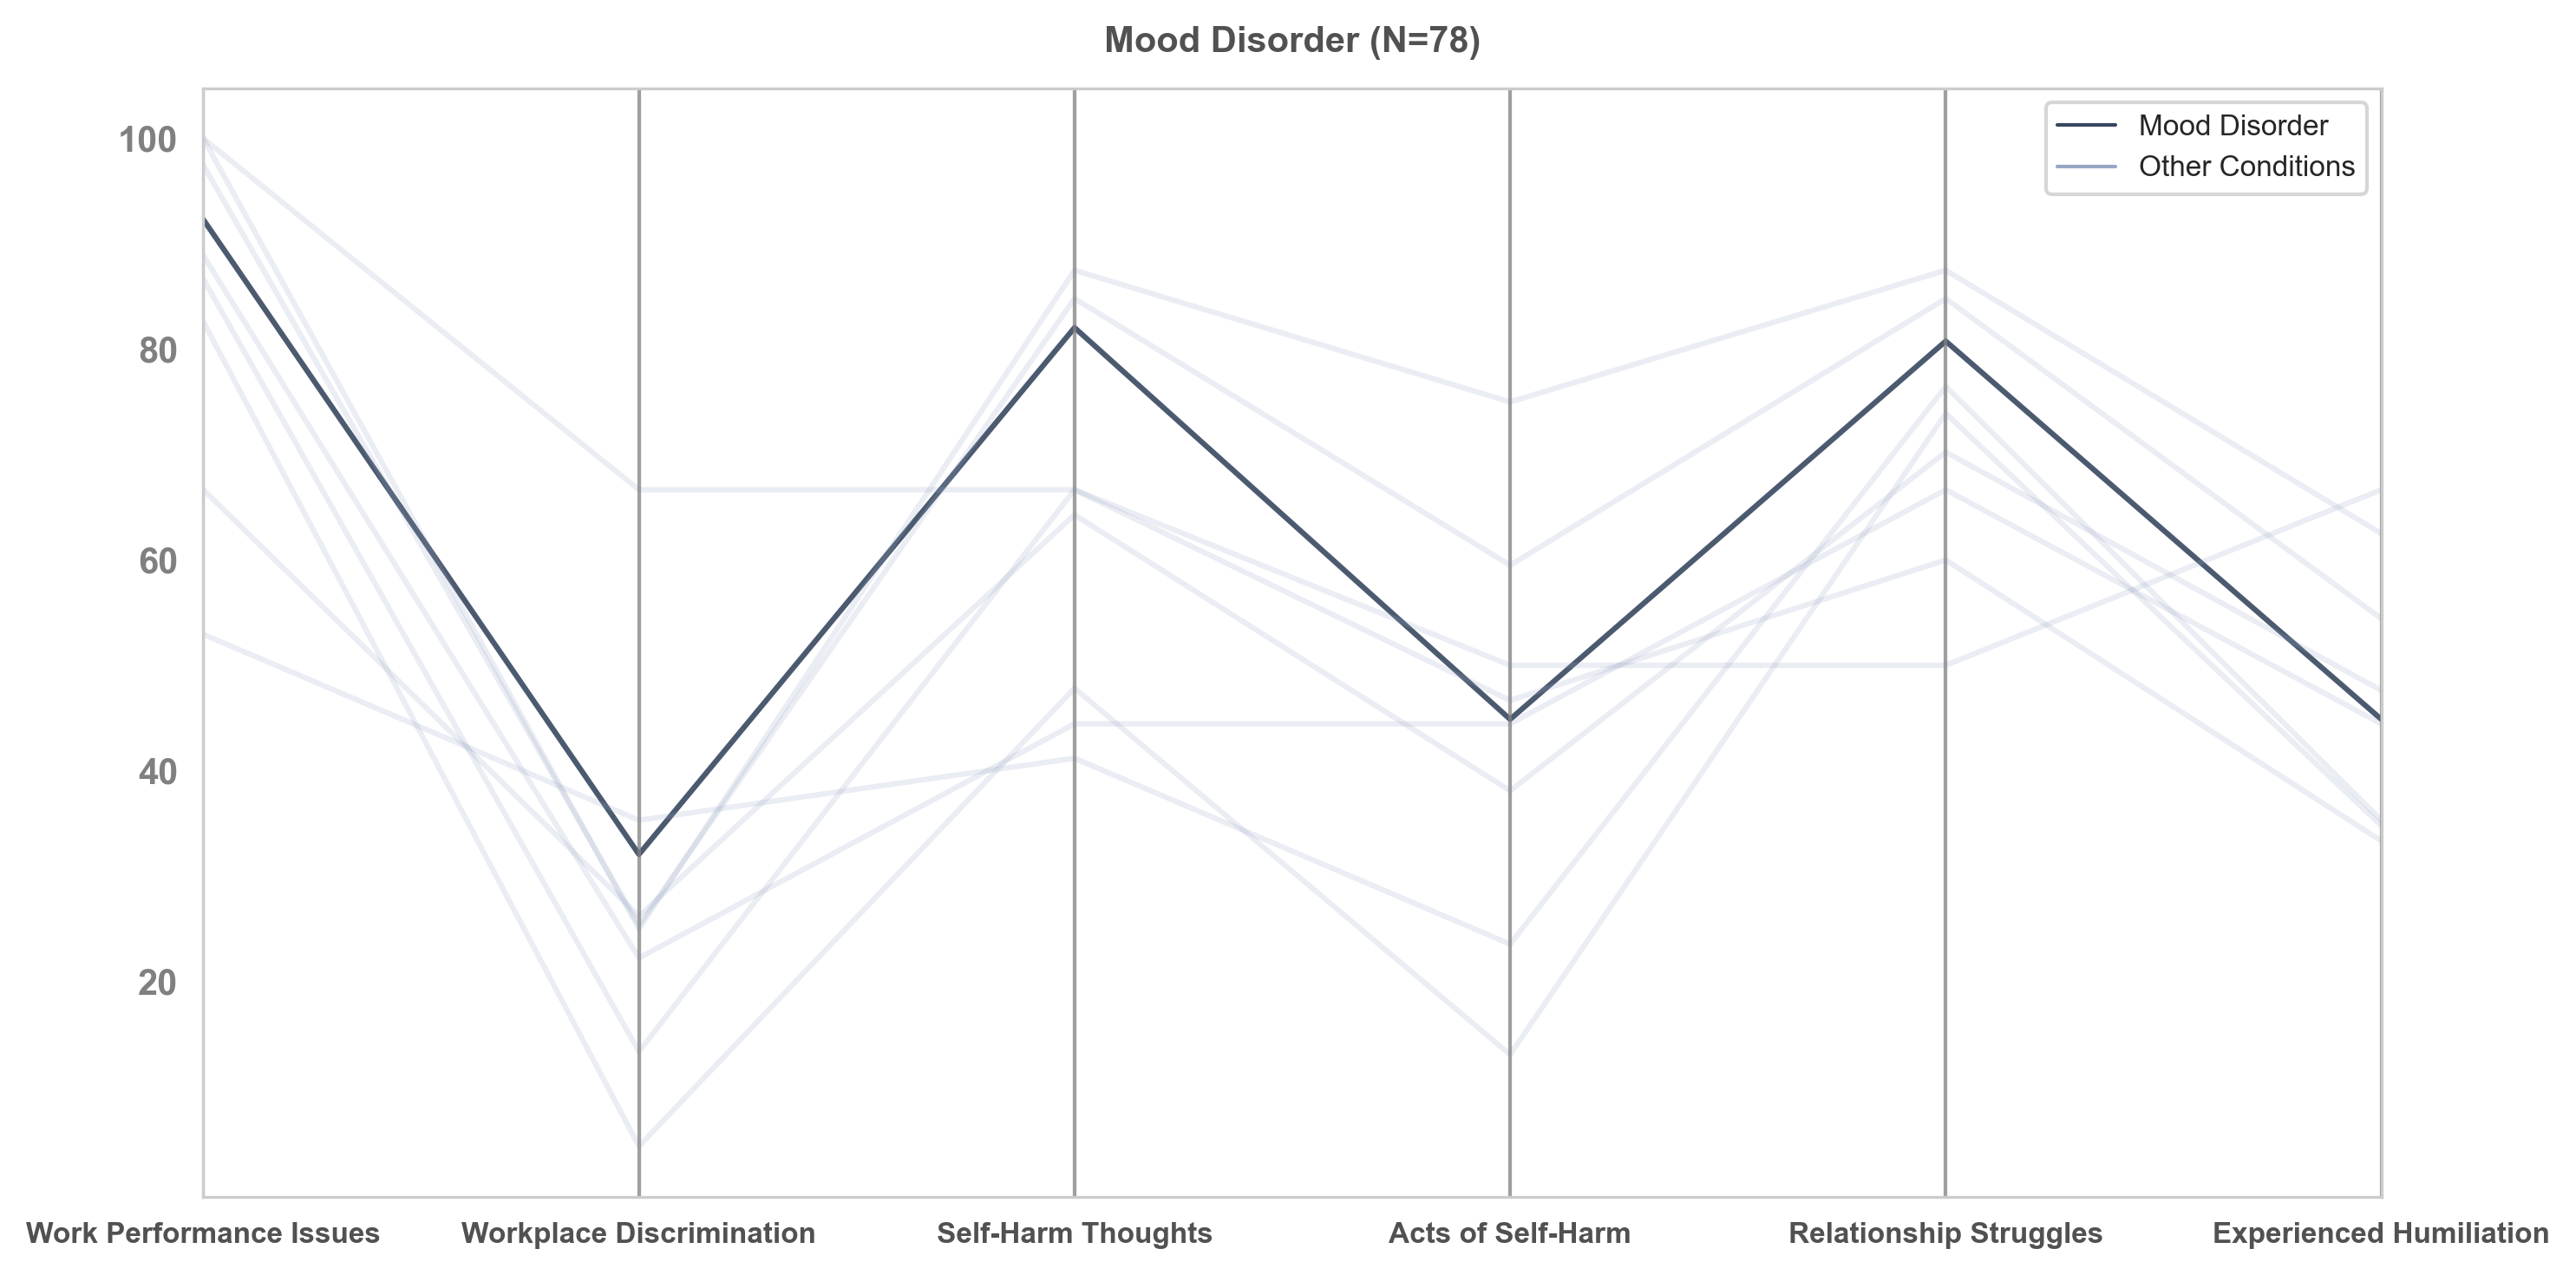

In [72]:
plot_parallel_coordinates(illness_impact_groupedby_diagnosis, "mood_disorder", 78)

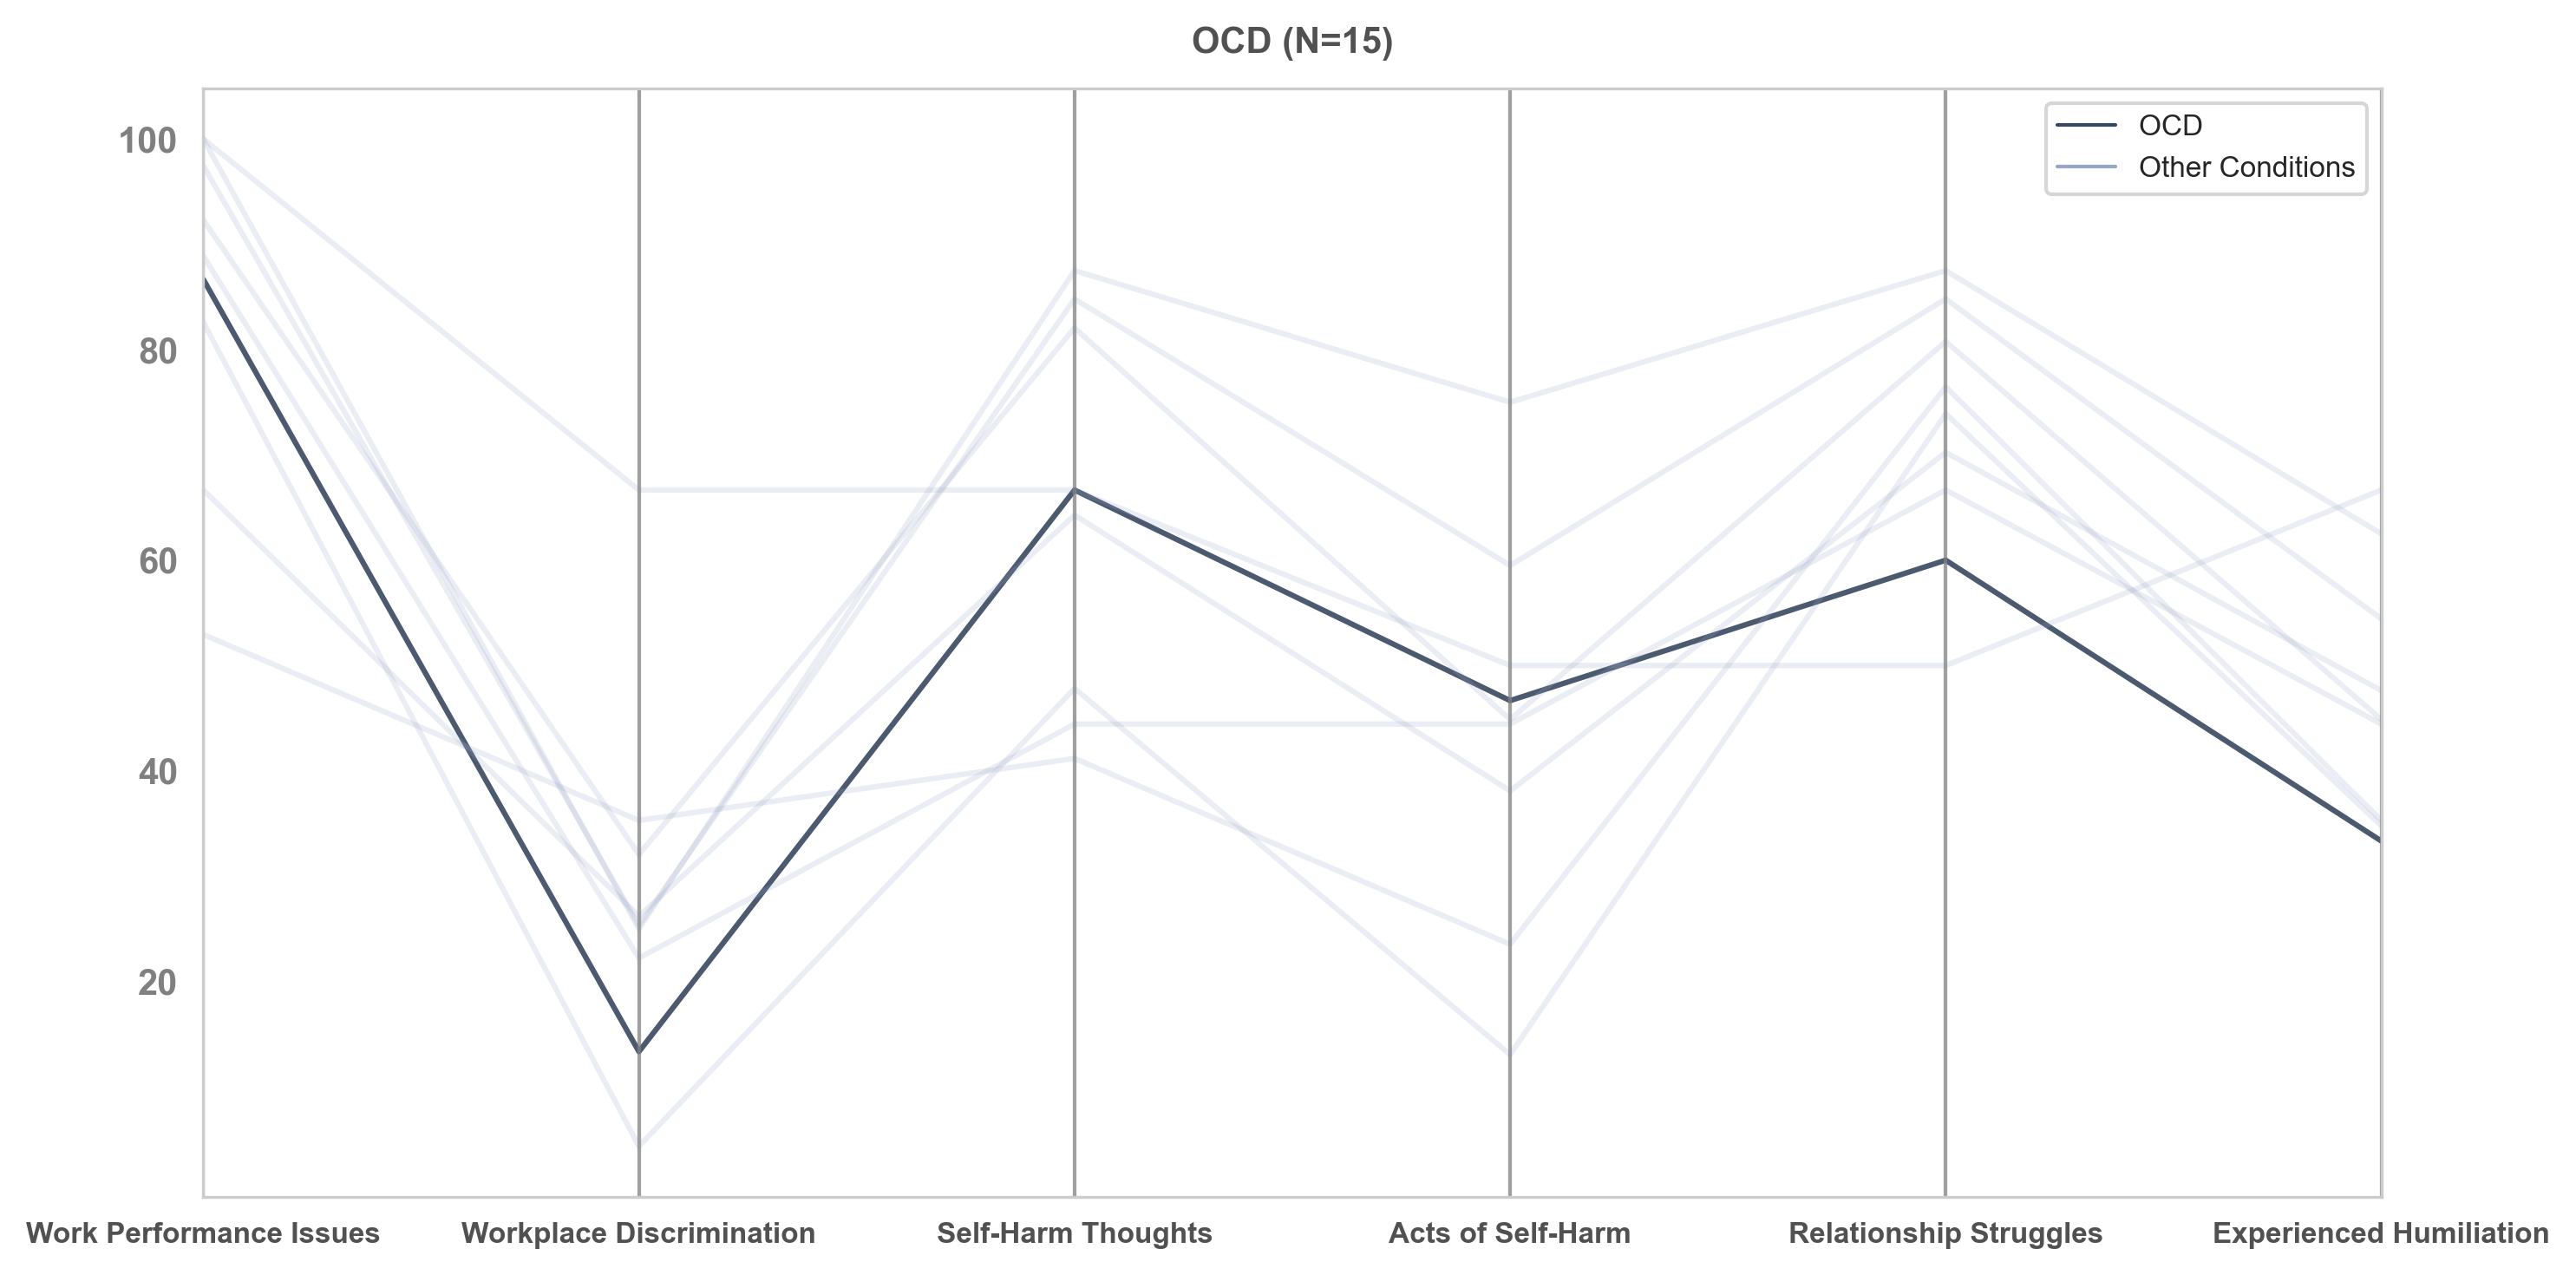

In [73]:
plot_parallel_coordinates(illness_impact_groupedby_diagnosis, "ocd", 15)

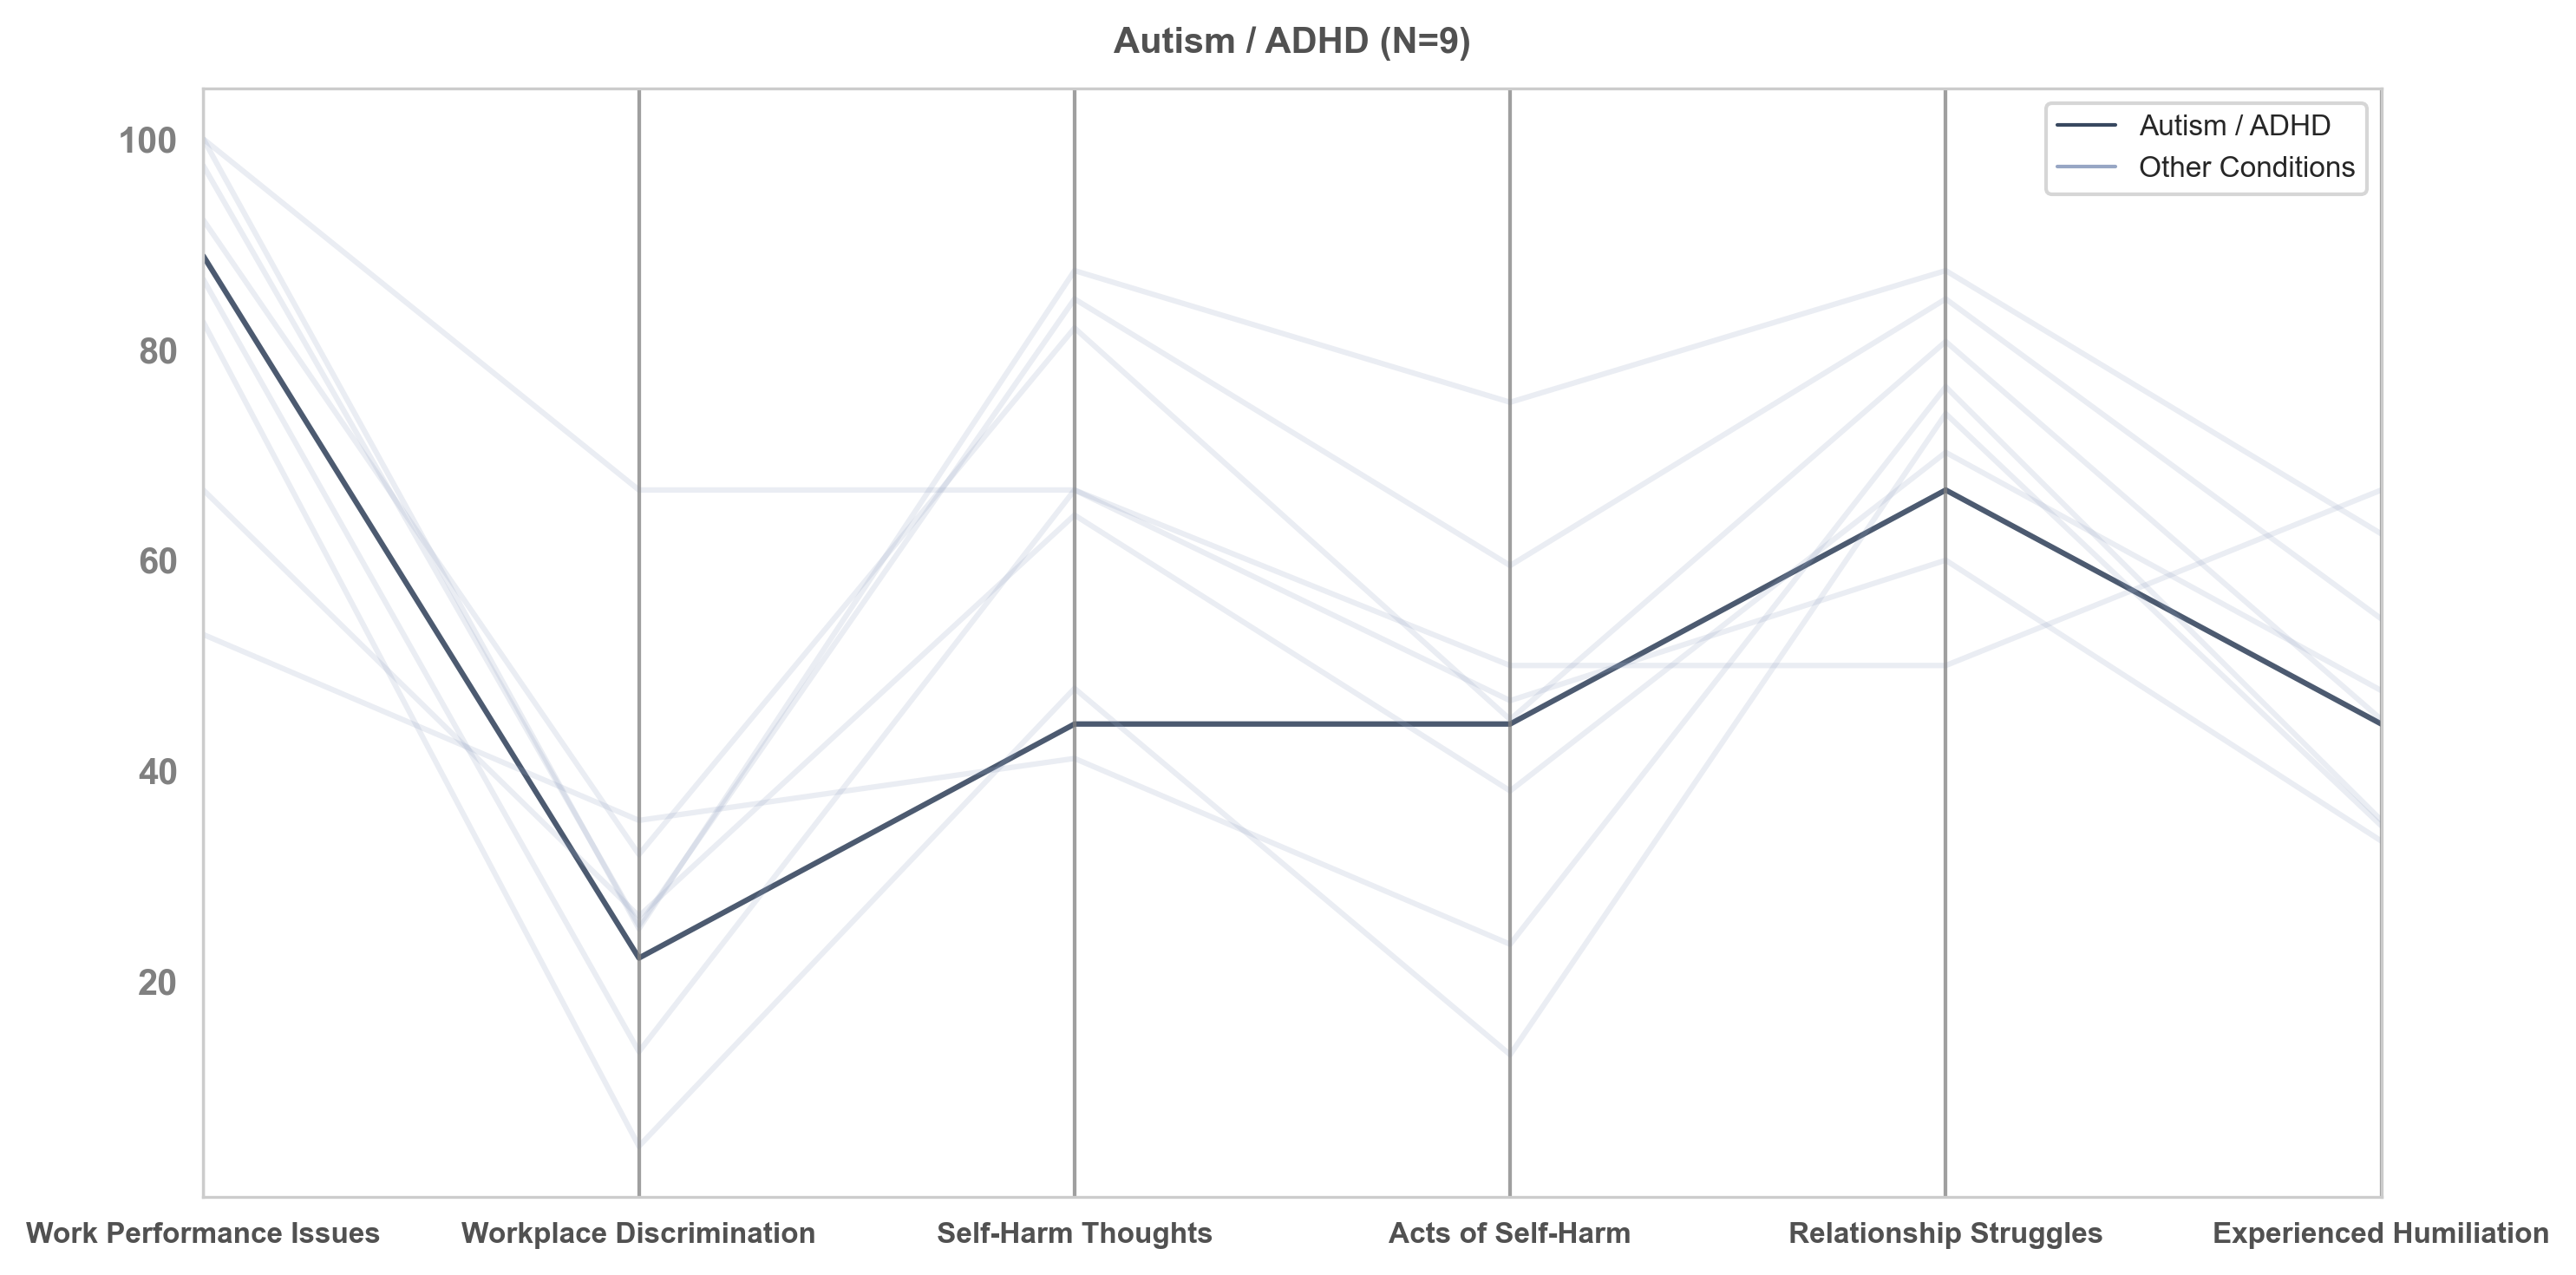

In [74]:
plot_parallel_coordinates(illness_impact_groupedby_diagnosis, "autism/adhd", 9)

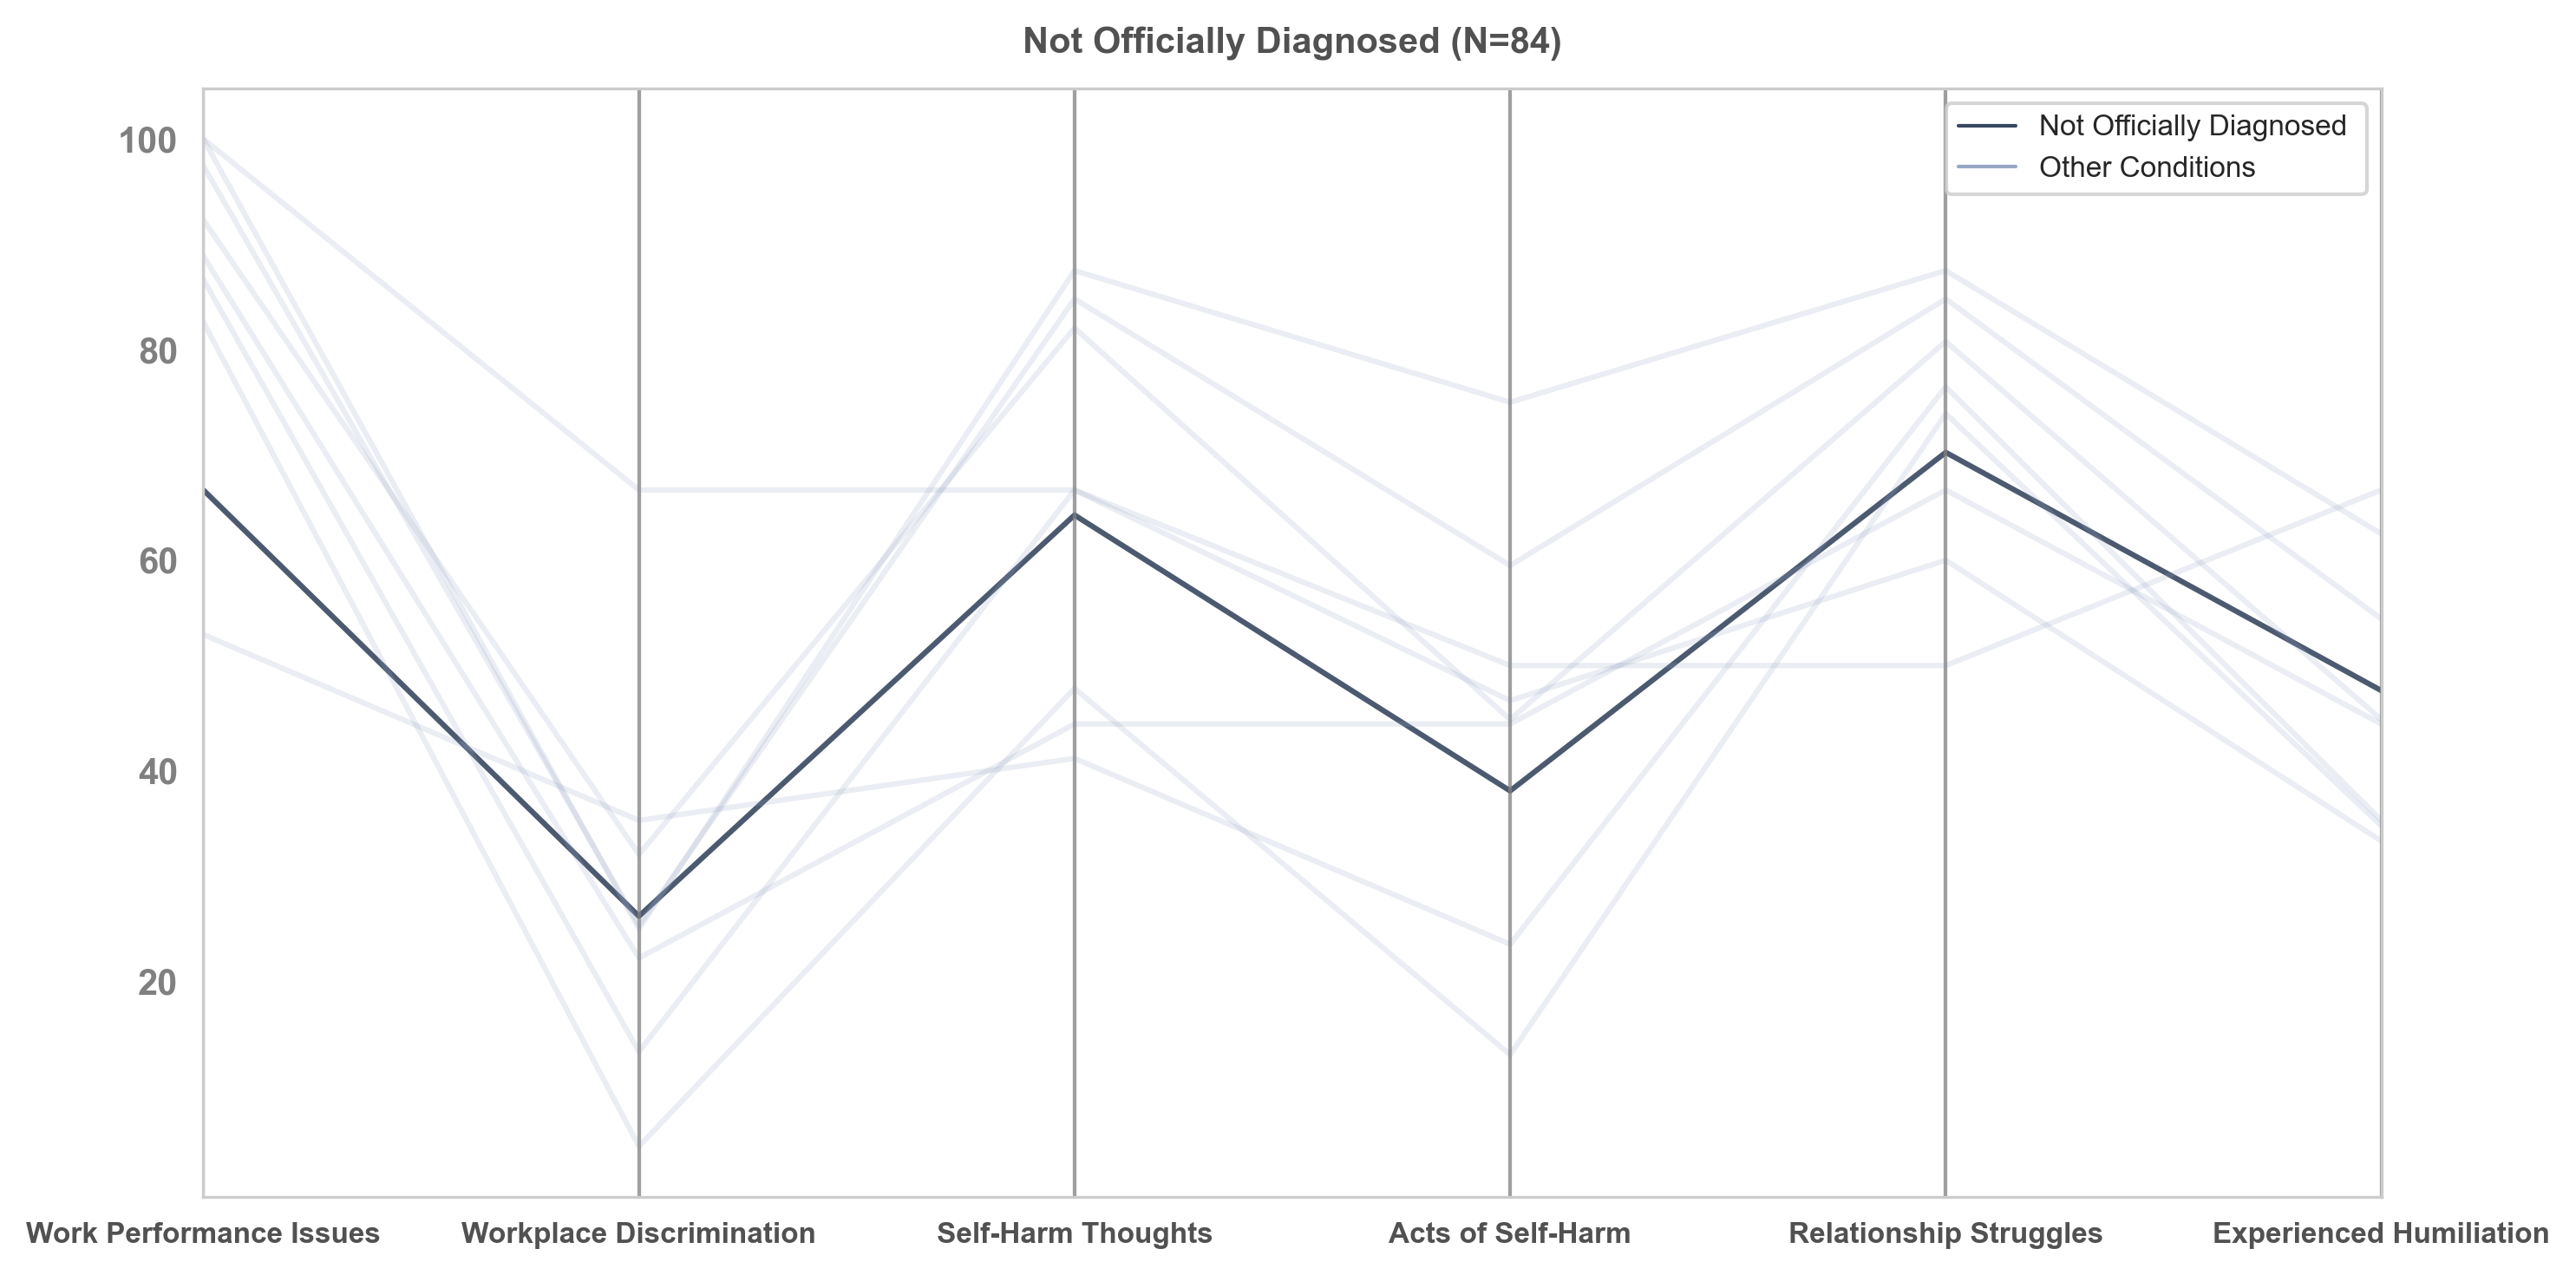

In [75]:
plot_parallel_coordinates(illness_impact_groupedby_diagnosis, "undiagnosed", 84)

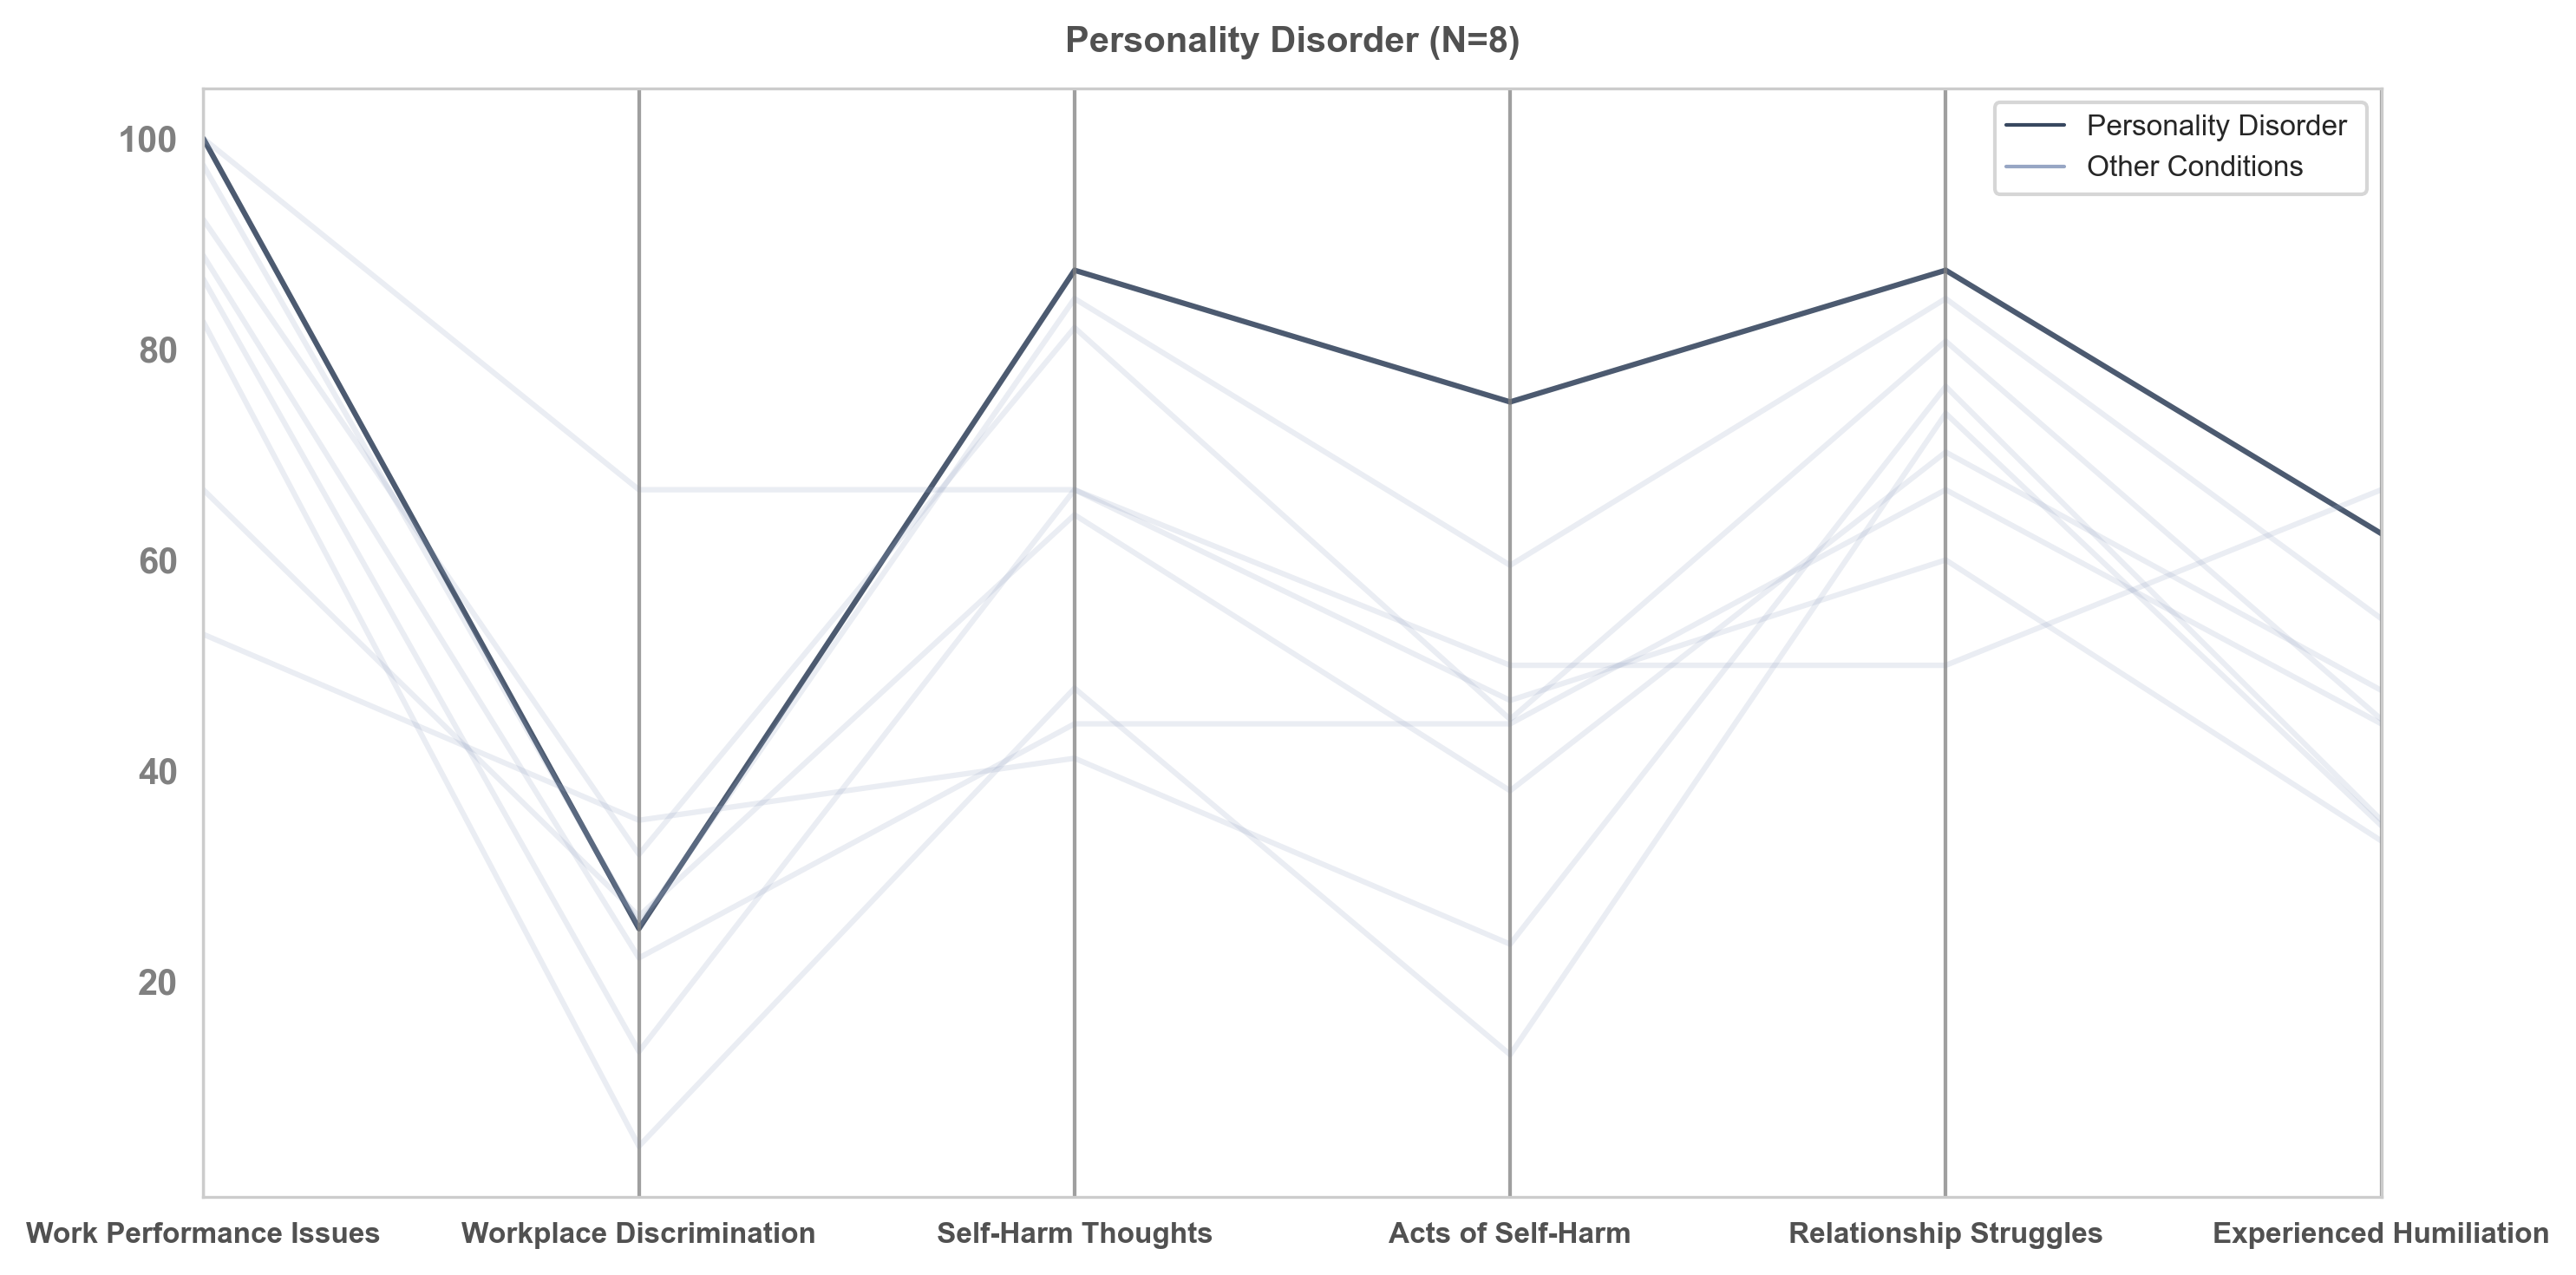

In [76]:
plot_parallel_coordinates(illness_impact_groupedby_diagnosis, "personality_disorder", 8)

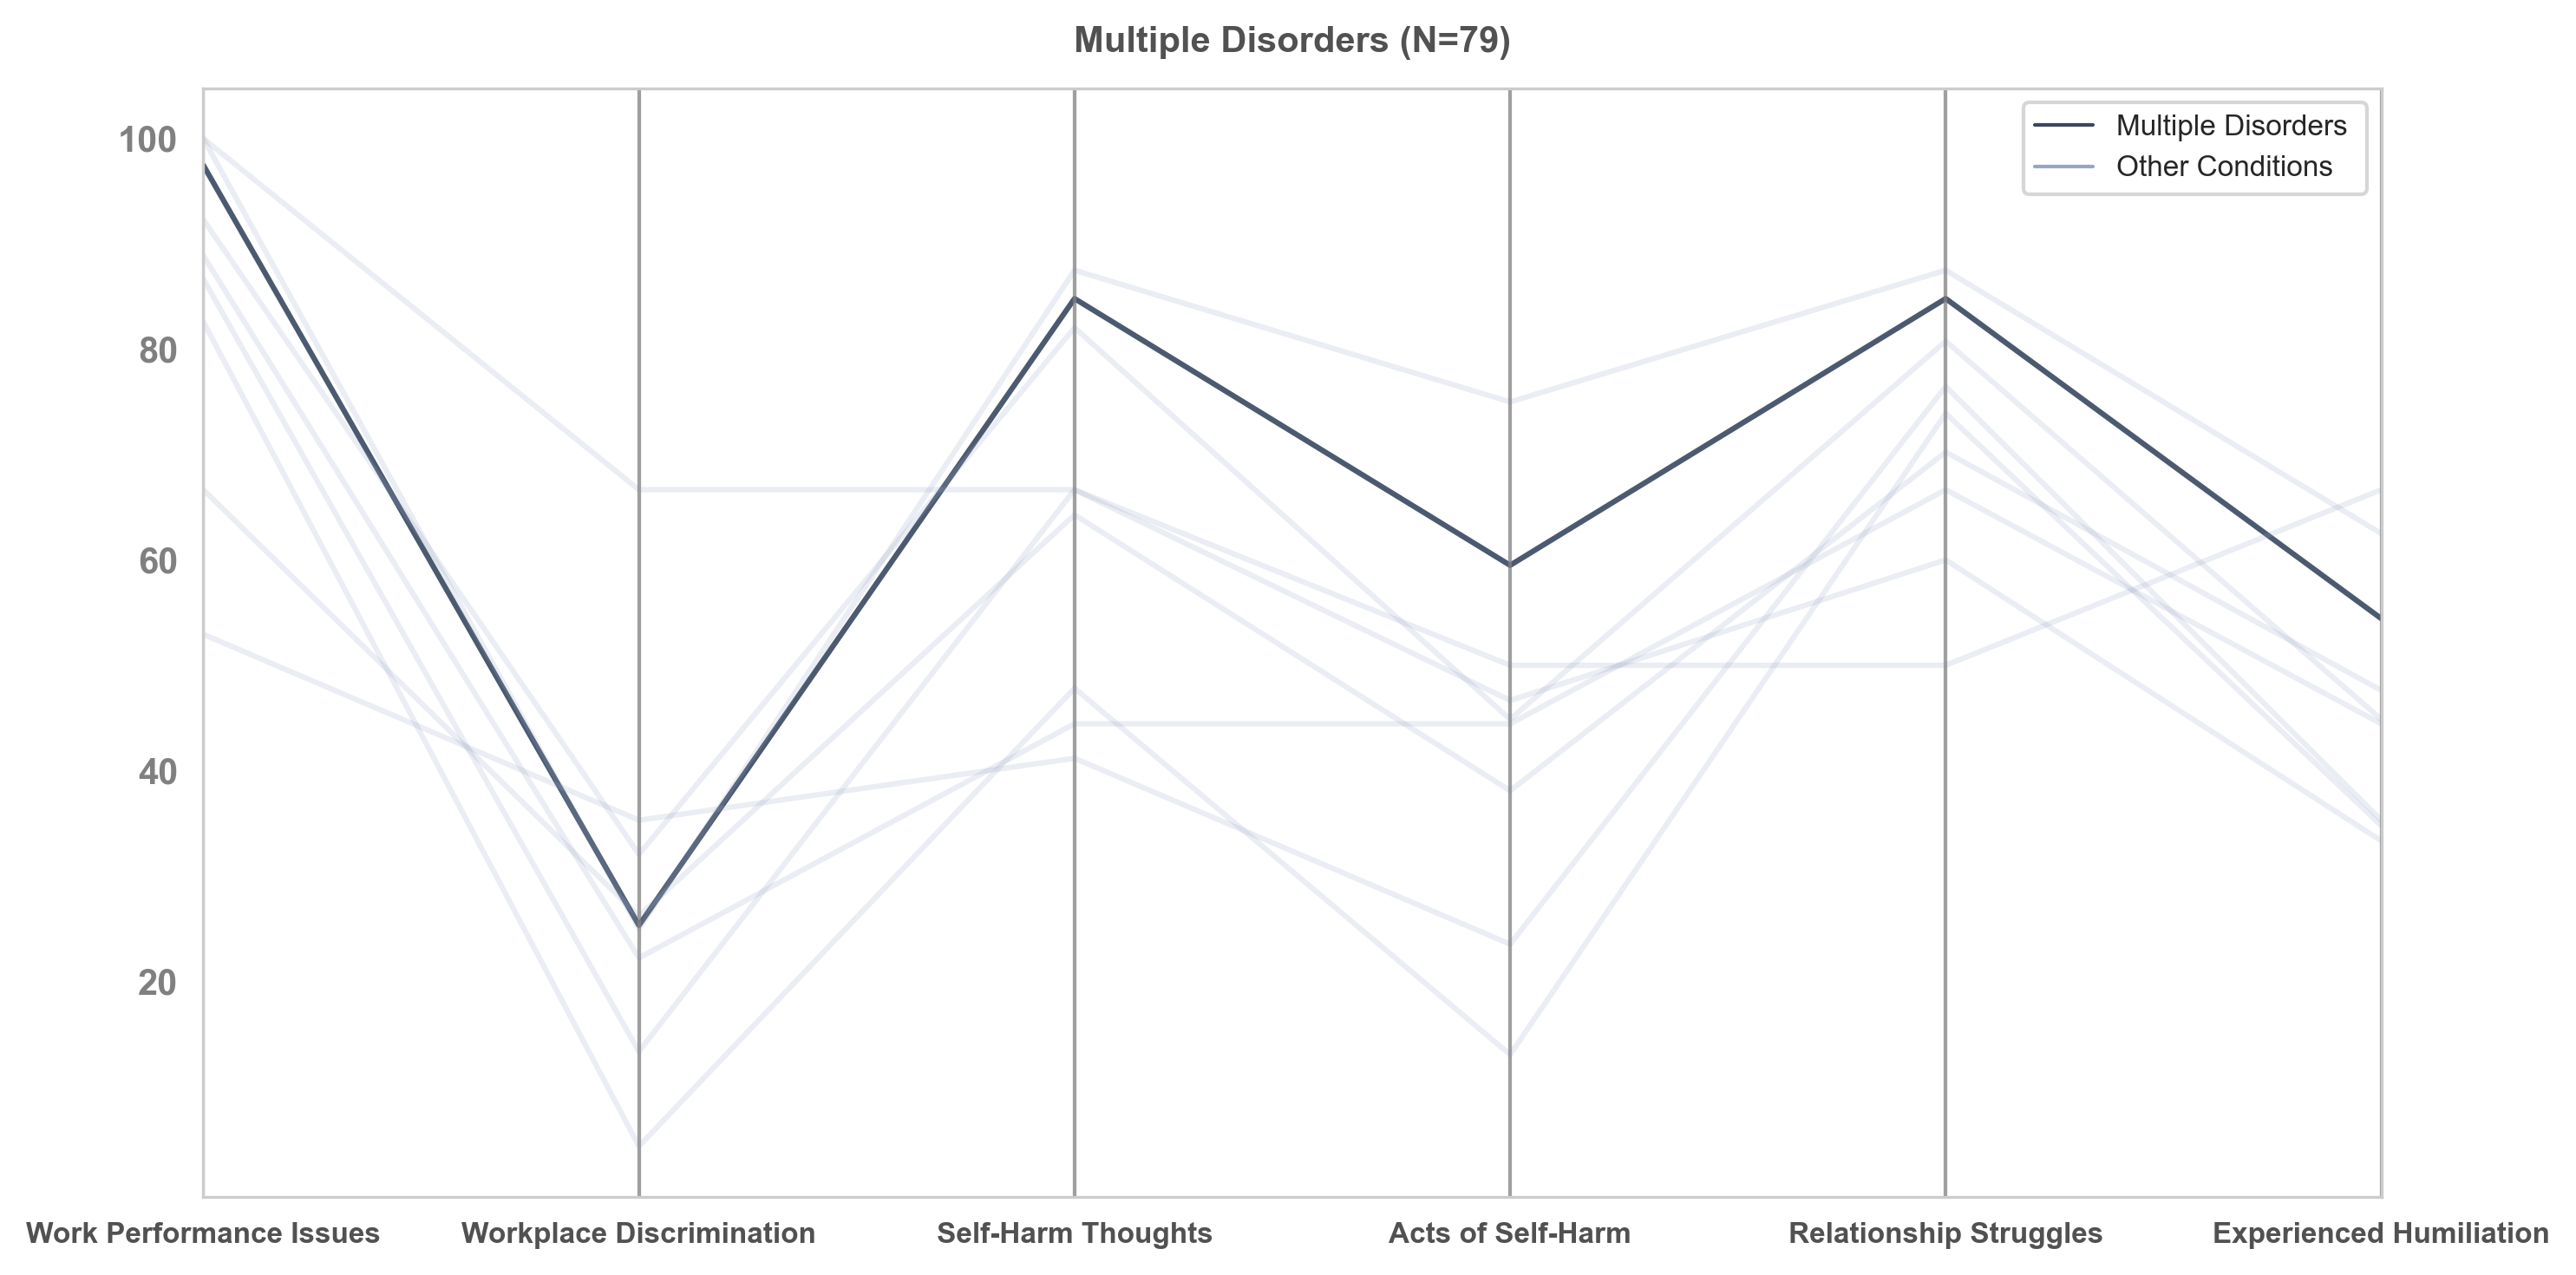

In [77]:
plot_parallel_coordinates(illness_impact_groupedby_diagnosis, "multiple", 79)

### **Which Diagnostic Groups are Most Affected by Stigma?**

In [78]:
stigma["diagnosis"].value_counts()

diagnosis
undiagnosed             84
multiple                79
mood_disorder           78
anxiety_disorder        23
carer                   17
ocd                     15
autism/adhd              9
personality_disorder     8
psychotic_illness        6
Name: count, dtype: int64

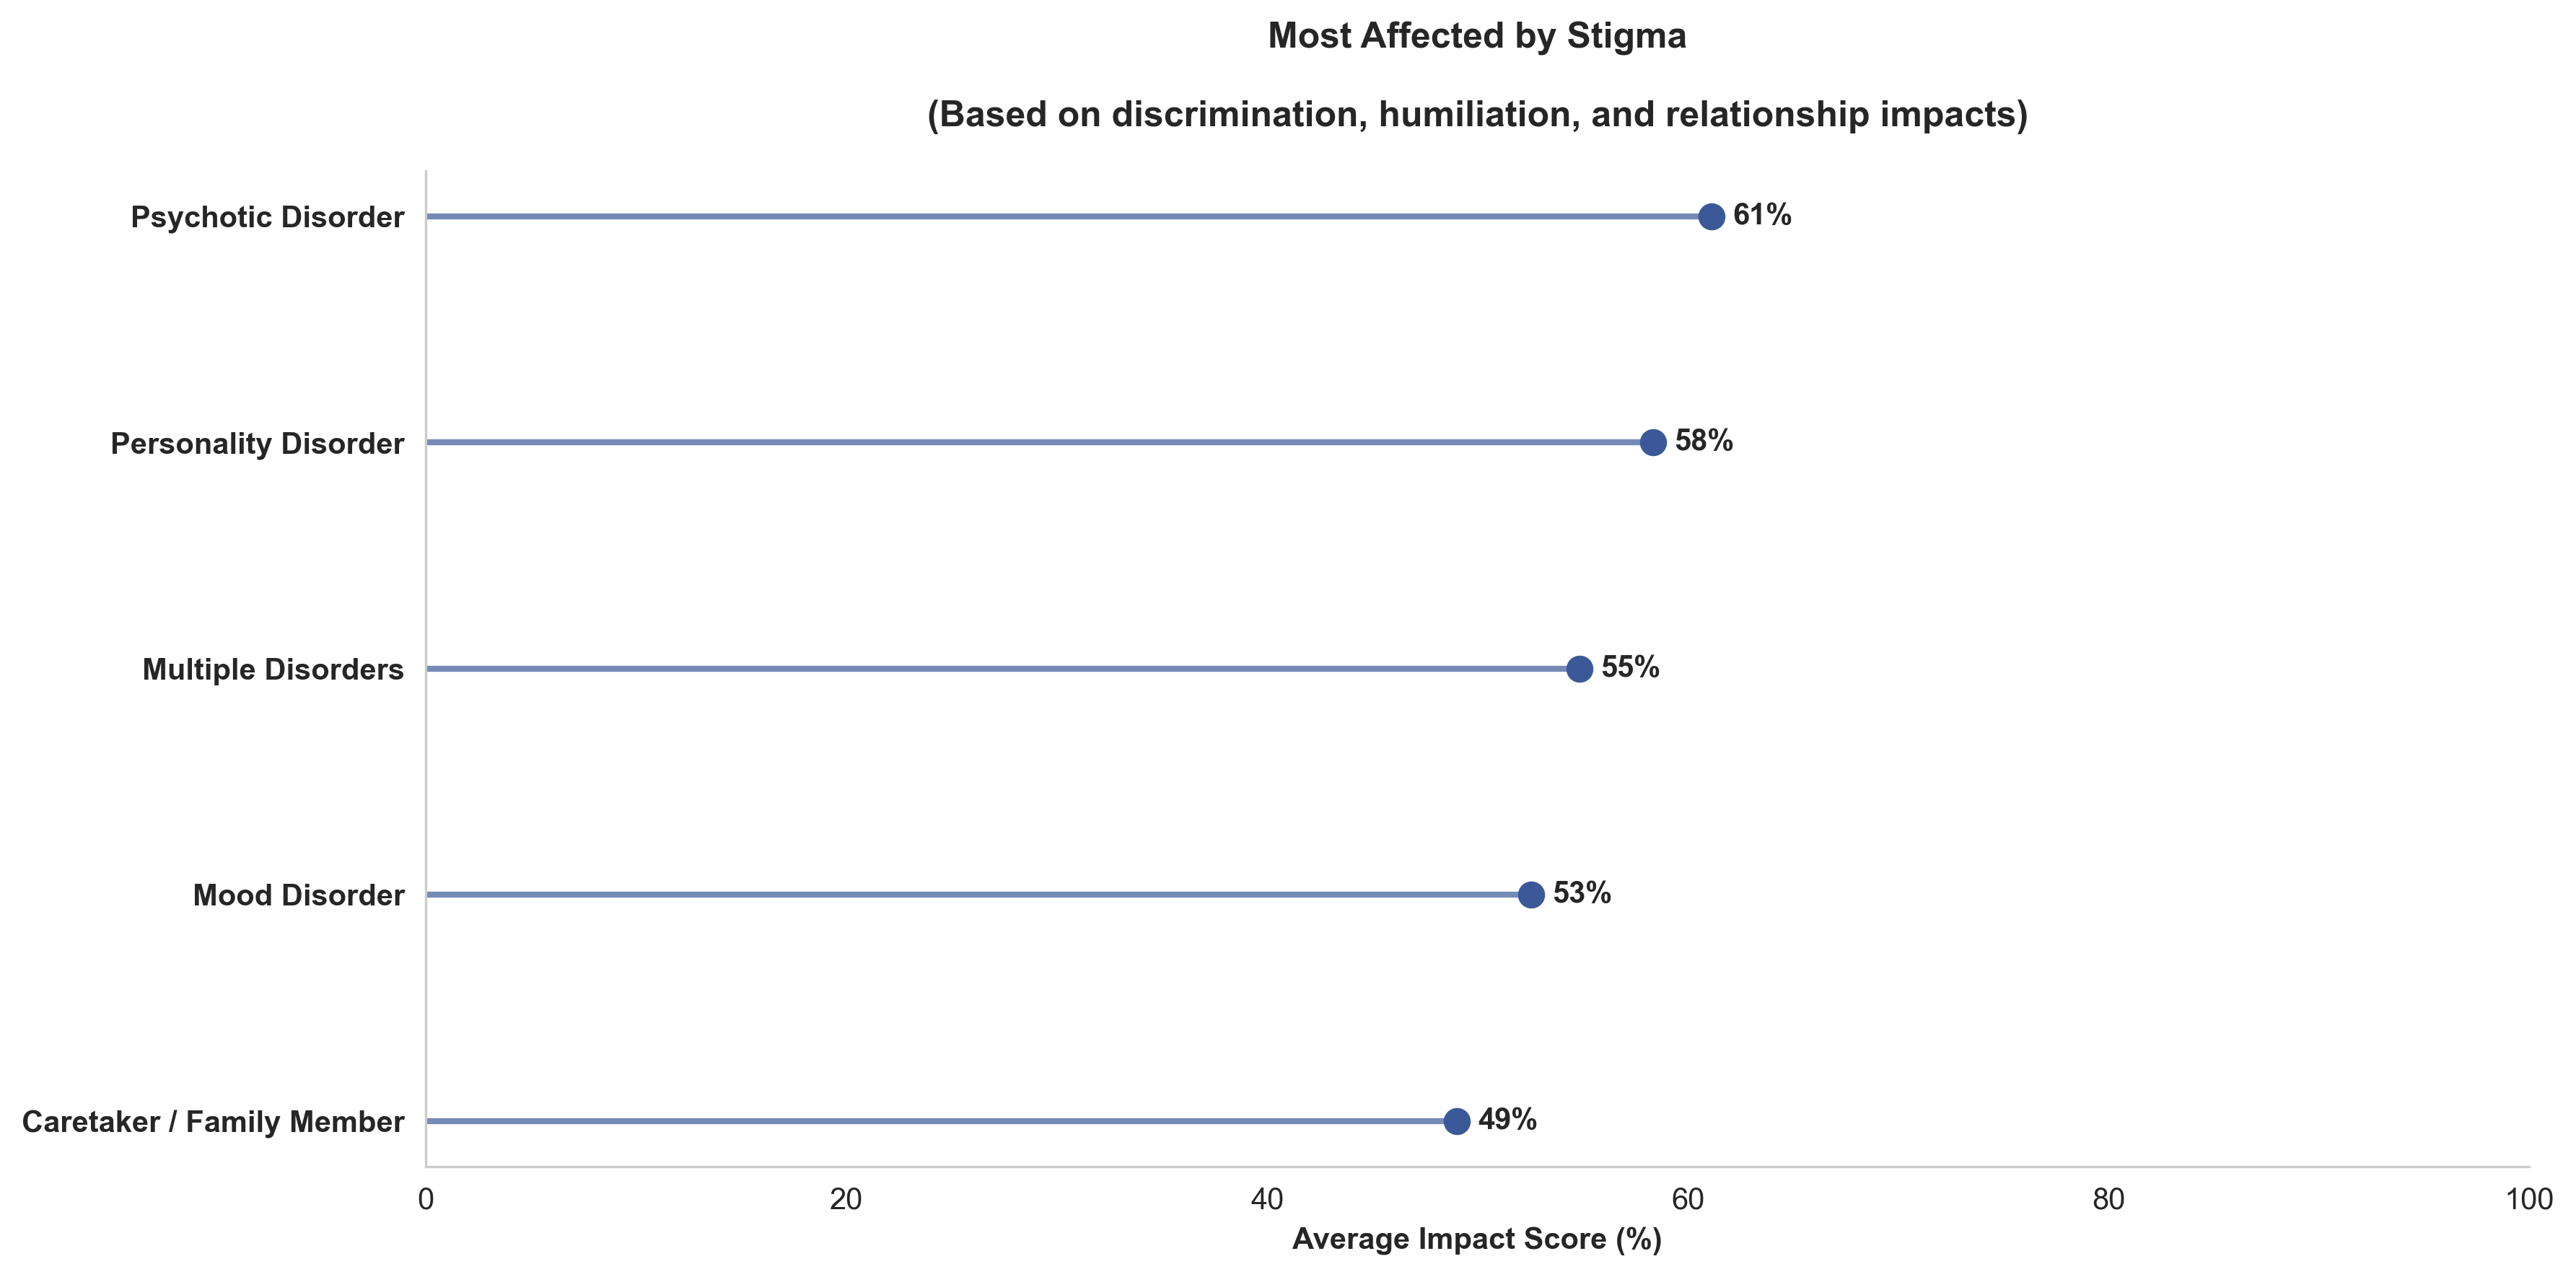

In [79]:
stigma_by_diagnosis = (
    stigma.groupby("diagnosis")[illness_stigma_cols].mean().mean(axis=1) * 100
)
stigma_by_diagnosis = stigma_by_diagnosis.sort_values(ascending=True)
top_5_stigma = stigma_by_diagnosis[-5:]
fig, ax = plt.subplots(figsize=(12, 6))

ax.hlines(
    y=range(len(top_5_stigma)),
    xmin=0,
    xmax=top_5_stigma.values,
    color="#3B5998",
    alpha=0.7,
    linewidth=2,
)

ax.plot(
    top_5_stigma.values, range(len(top_5_stigma)), "o", markersize=8, color="#3B5998"
)

for i, v in enumerate(top_5_stigma.values):
    ax.text(v + 1, i, f"{v:.0f}%", va="center", fontweight="bold")


ax.set_yticks(range(len(top_5_stigma)))
ax.set_yticklabels([diagnosis_map[x] for x in top_5_stigma.index], fontweight="bold")


plt.title(
    "Most Affected by Stigma\n\n(Based on discrimination, humiliation, and relationship impacts)",
    fontweight="bold",
    fontsize=12,
    pad=15,
)

plt.xlabel("Average Impact Score (%)", fontweight="bold")
plt.ylabel("")

sns.despine(top=True, right=True)

plt.grid(False)

plt.xlim(0, 100)

plt.tight_layout()
plt.show()

### **Which diagnostic Groups are more affected by their illness on a Personal Level?**

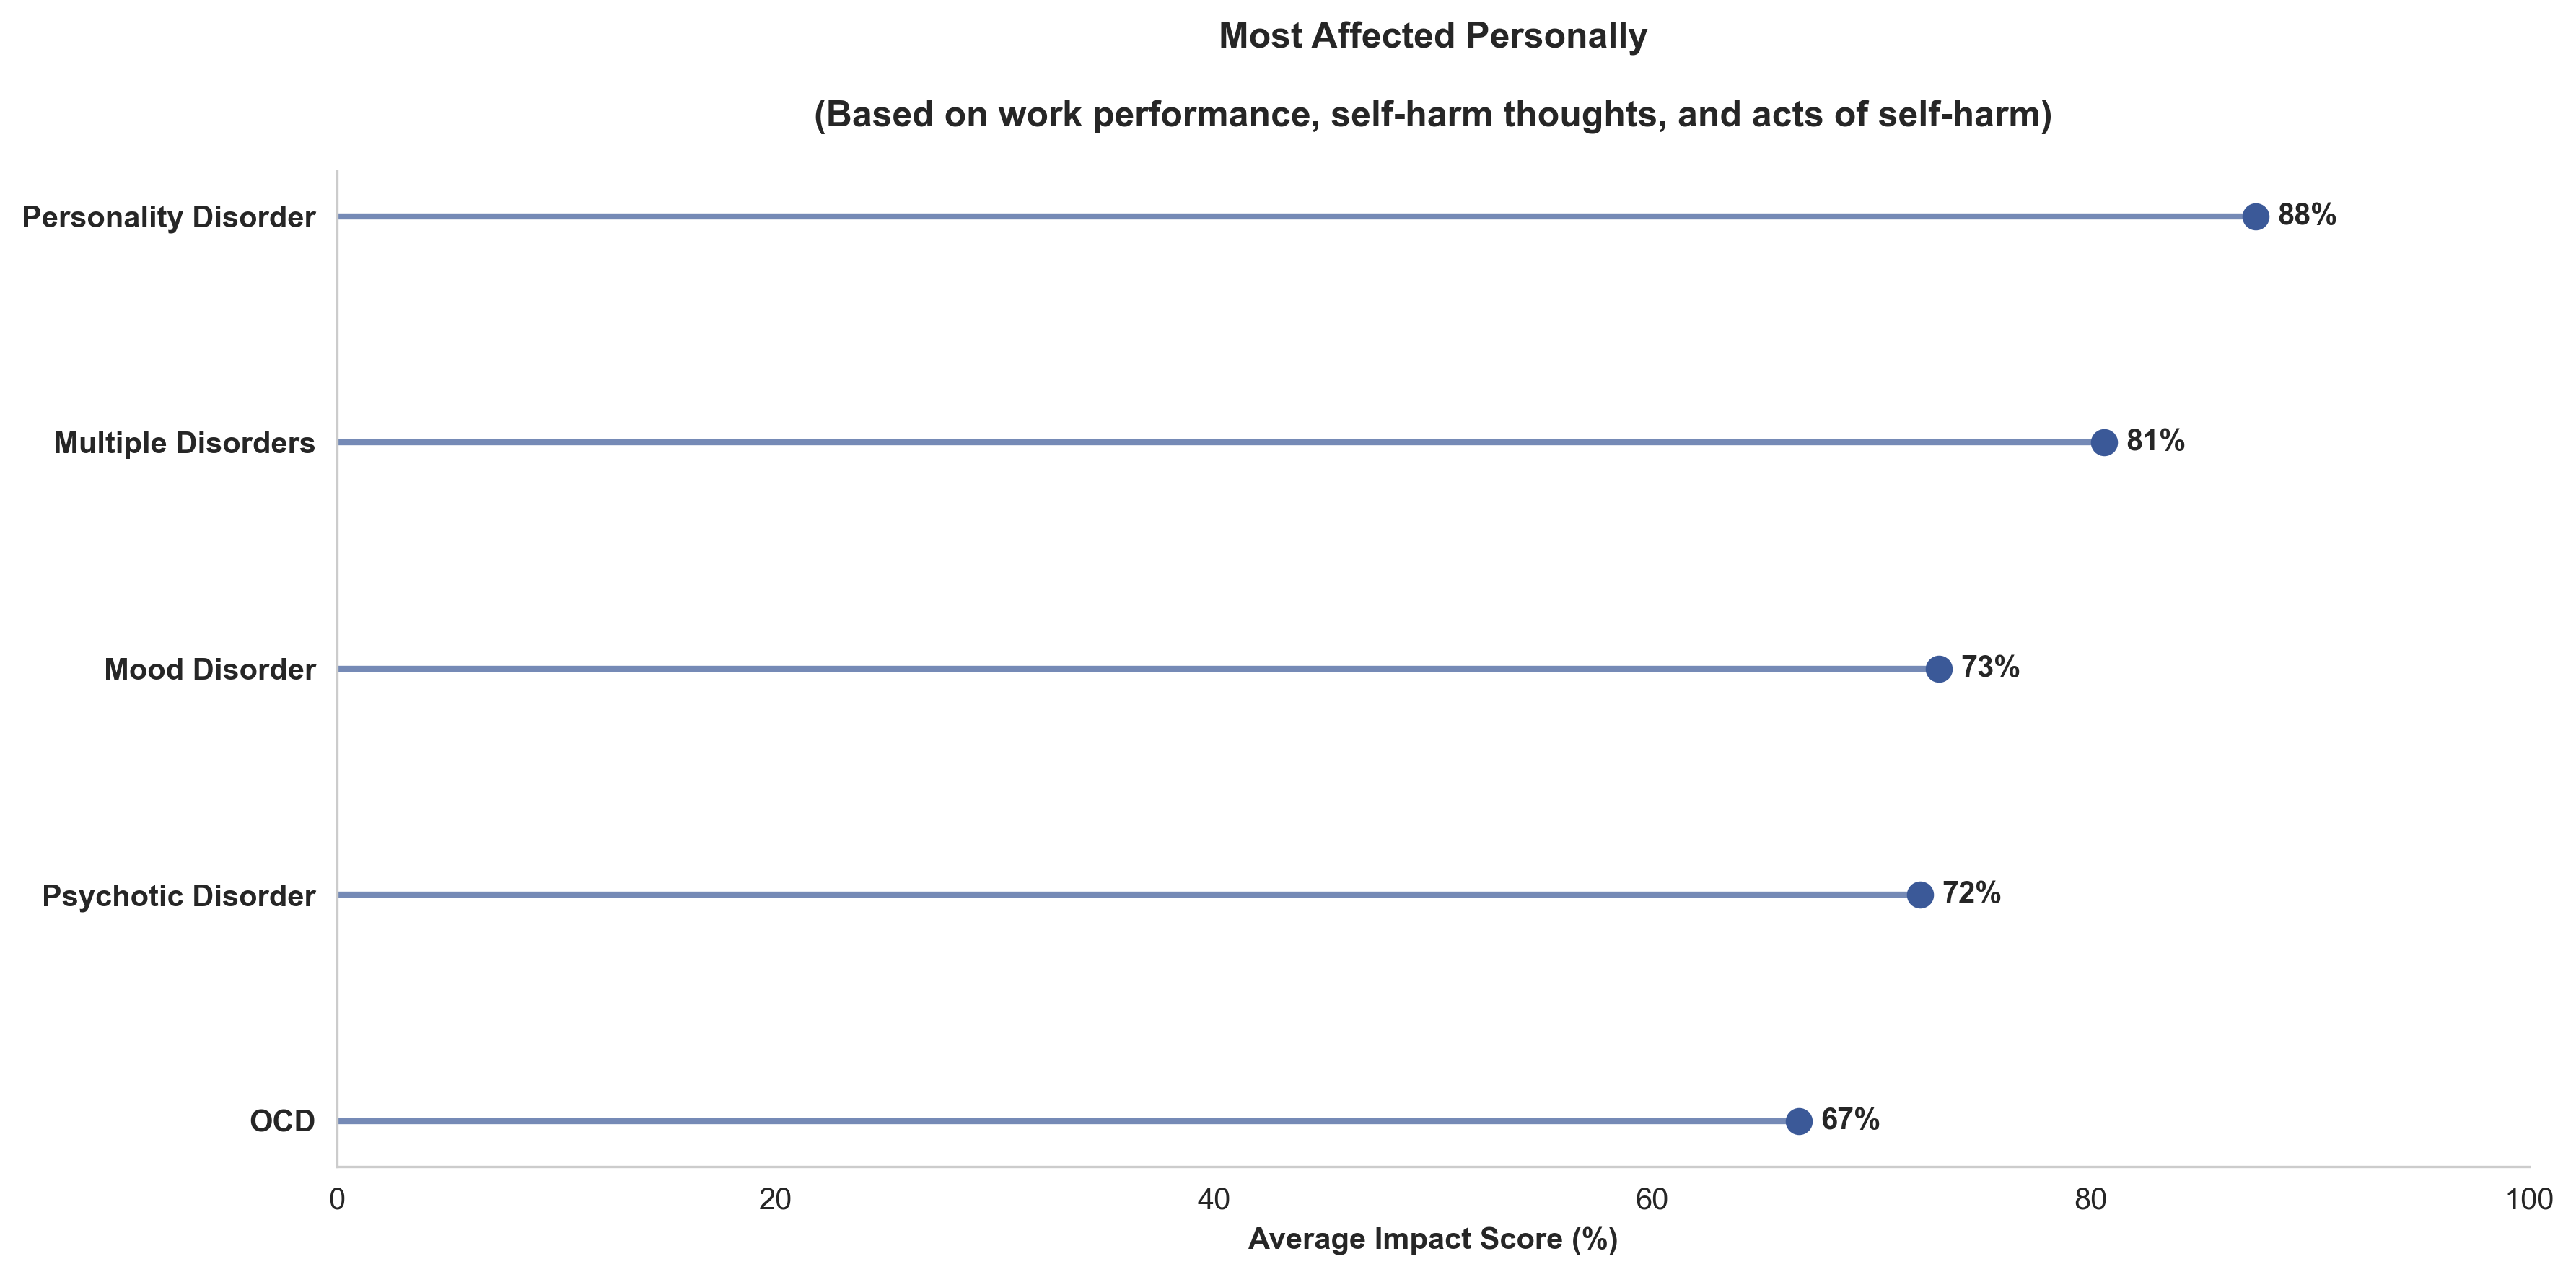

In [80]:
personal_impact_by_diagnosis = (
    stigma.groupby("diagnosis")[illness_personal_cols].mean().mean(axis=1) * 100
)
personal_impact_by_diagnosis = personal_impact_by_diagnosis.sort_values(ascending=True)
top_5_personal = personal_impact_by_diagnosis[-5:]

fig, ax = plt.subplots(figsize=(12, 6))

ax.hlines(
    y=range(len(top_5_personal)),
    xmin=0,
    xmax=top_5_personal.values,
    color="#3B5998",
    alpha=0.7,
    linewidth=2,
)

ax.plot(
    top_5_personal.values,
    range(len(top_5_personal)),
    "o",
    markersize=8,
    color="#3B5998",
)

for i, v in enumerate(top_5_personal.values):
    ax.text(v + 1, i, f"{v:.0f}%", va="center", fontweight="bold")

ax.set_yticks(range(len(top_5_personal)))
ax.set_yticklabels([diagnosis_map[x] for x in top_5_personal.index], fontweight="bold")

plt.title(
    "Most Affected Personally\n\n(Based on work performance, self-harm thoughts, and acts of self-harm)",
    fontweight="bold",
    fontsize=12,
    pad=15,
)

plt.xlabel("Average Impact Score (%)", fontweight="bold")
plt.ylabel("")

sns.despine(top=True, right=True)
plt.grid(False)
plt.xlim(0, 100)

plt.tight_layout()
plt.show()

### **Treatment-Seeking Barriers: reasons participants abandon treatment or are reluctant to pursue it**

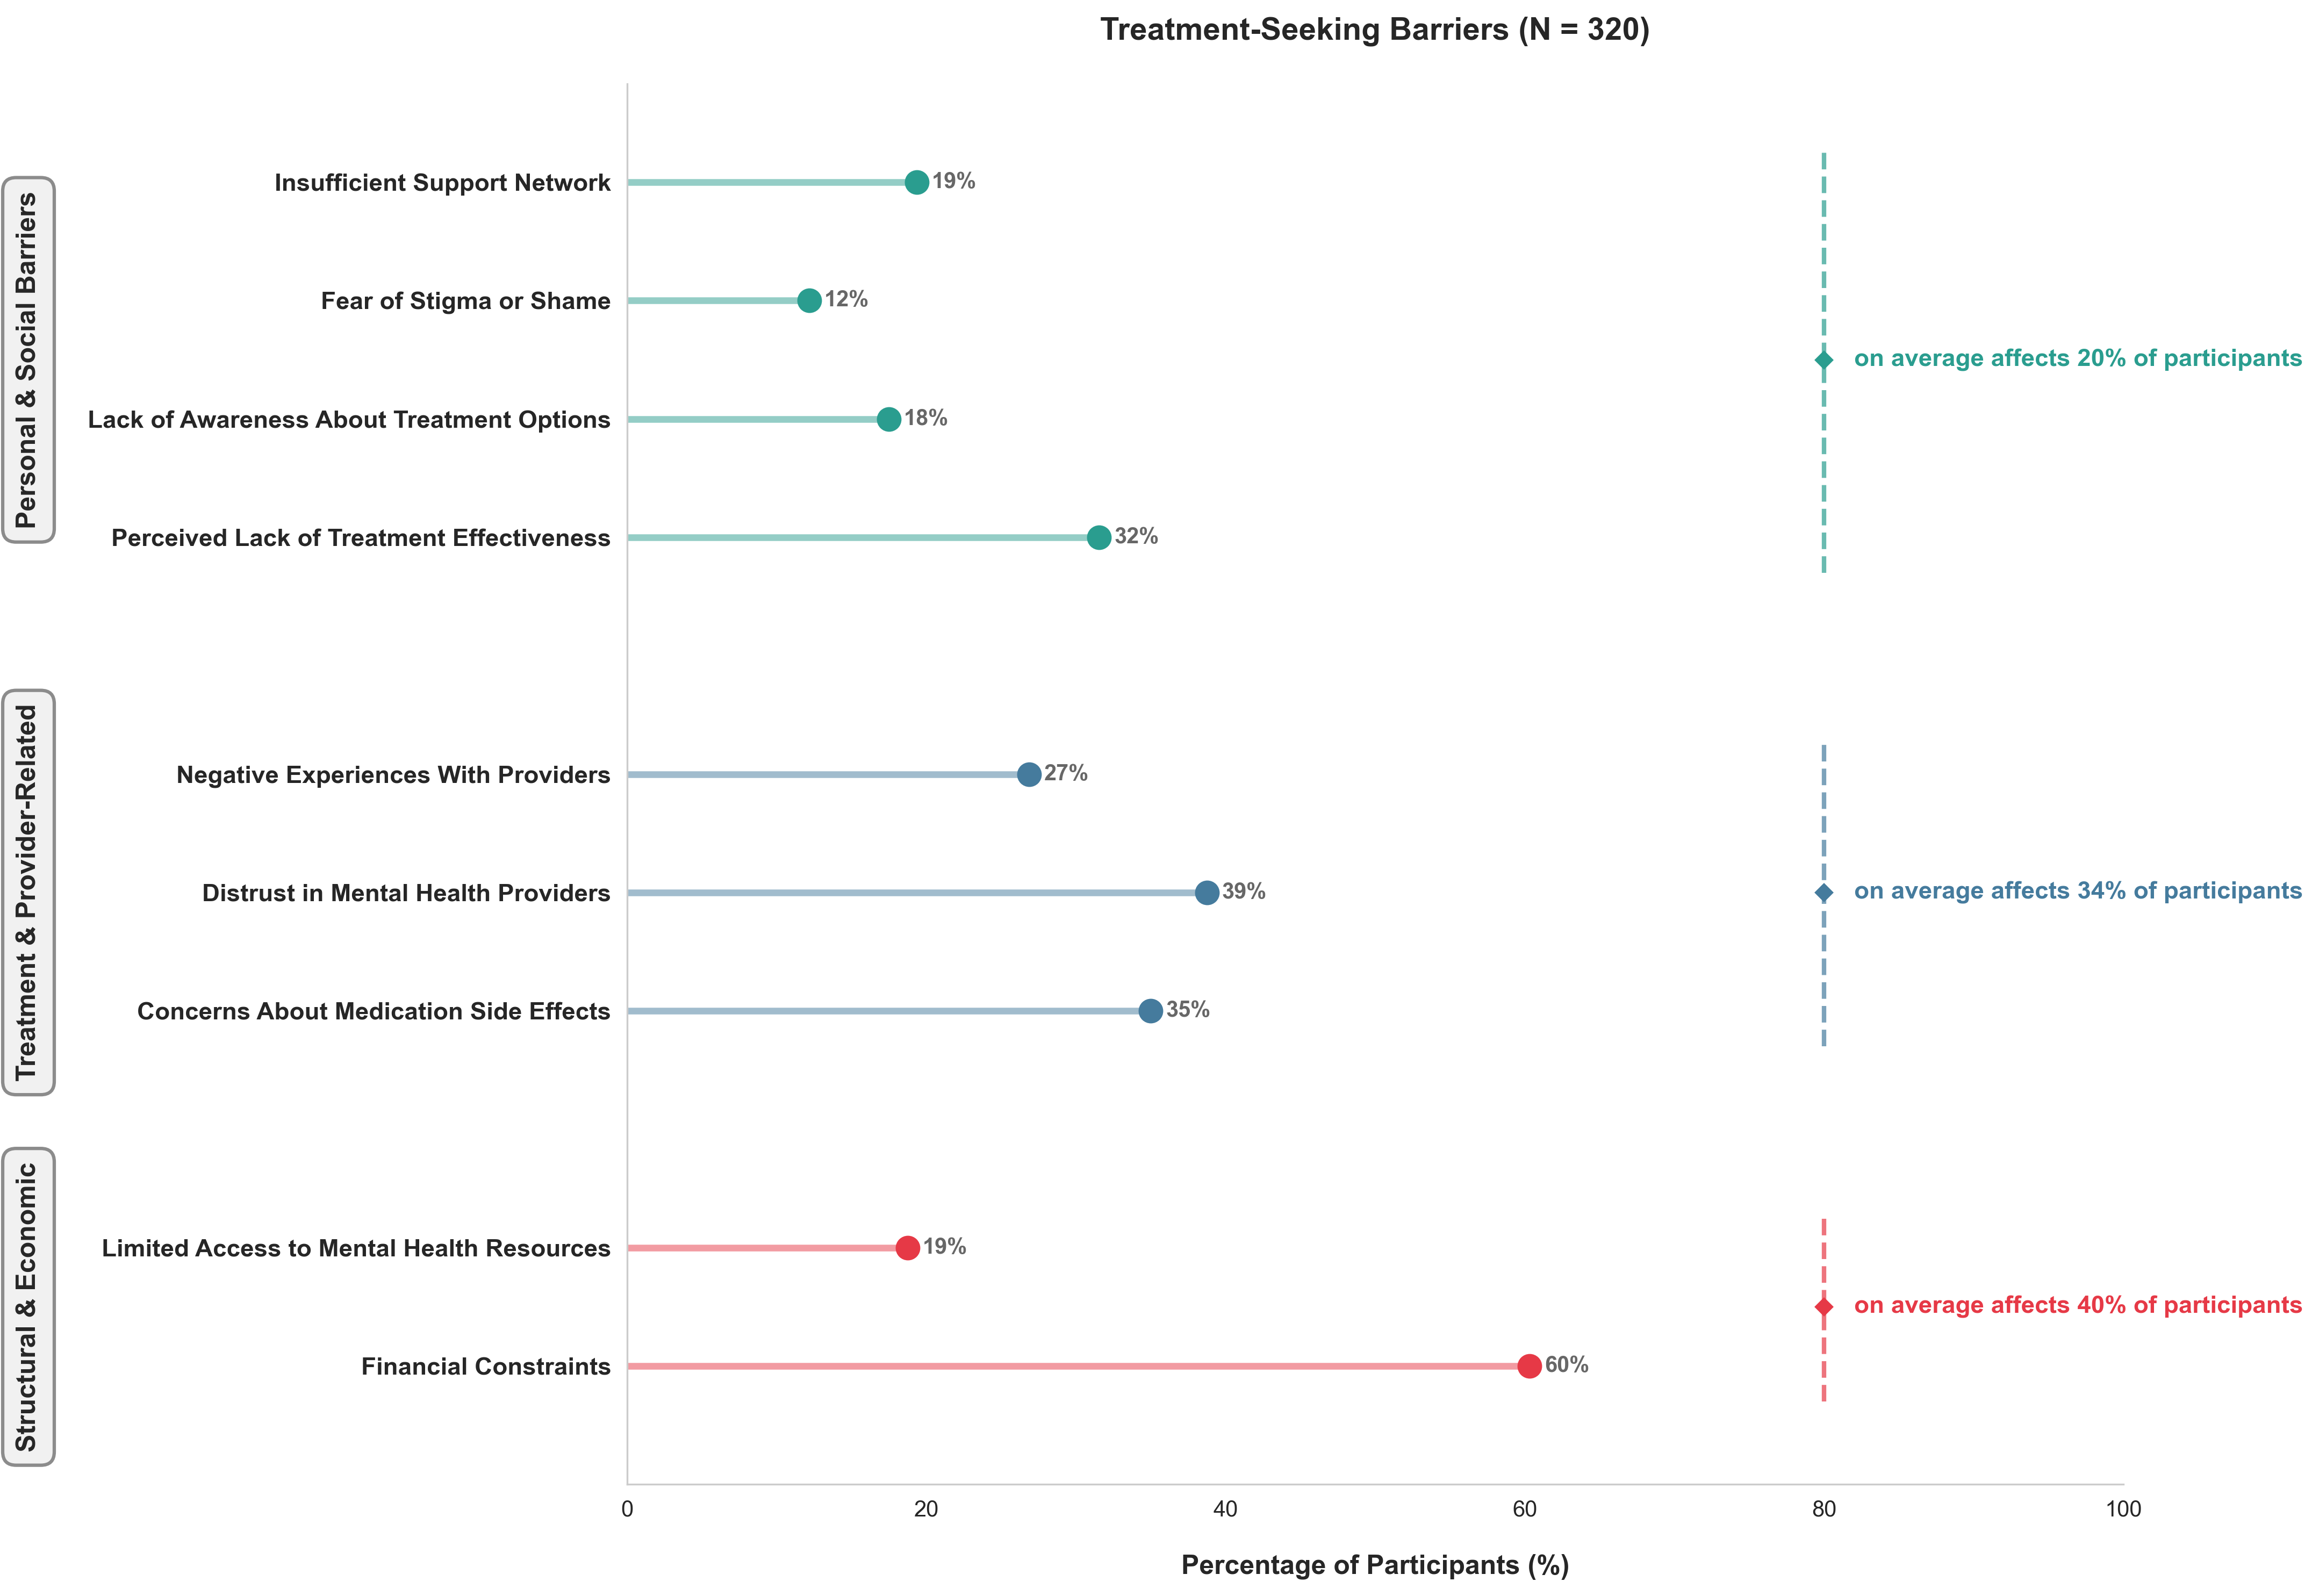

In [ ]:
treatment_percentages = stigma[treatment_related_cols].mean() * 100
treatment_percentages = pd.Series(treatment_percentages)

fig, ax = plt.subplots(figsize=(15, 10))

current_y = 0
y_positions = {}
barrier_colors = {}
group_averages = {}


for group_name, group_info in barrier_groups.items():
    group_data = treatment_percentages[group_info["columns"]]
    group_avg = group_data.mean()
    group_averages[group_name] = group_avg

    for col in group_data.index:
        y_positions[col] = current_y
        barrier_colors[col] = group_info["color"]
        current_y += 1

    if group_name != list(barrier_groups.keys())[-1]:
        current_y += 1

for col, value in treatment_percentages.items():
    y = y_positions[col]
    color = barrier_colors[col]
    ax.hlines(y=y, xmin=0, xmax=value, color=color, alpha=0.5, linewidth=3)
    ax.plot(value, y, "o", color=color, markersize=10)
    ax.text(
        value + 1,
        y,
        f"{value:.0f}%",
        va="center",
        fontsize=10,
        fontweight="bold",
        alpha=0.7,
    )


ax.set_yticks(list(y_positions.values()))
ax.set_yticklabels(
    [treatment_label_map[col] for col in y_positions.keys()],
    fontweight="bold",
    fontsize=11,
)

current_y = 0
for group_name, group_info in barrier_groups.items():
    group_size = len(group_info["columns"])
    group_middle = current_y + (group_size - 1) / 2

    ax.text(
        -40,
        group_middle,
        group_name,
        fontsize=12,
        fontweight="bold",
        ha="center",
        va="center",
        bbox=dict(
            facecolor="#f0f0f0",
            edgecolor="grey",
            boxstyle="round,pad=0.5",
            linewidth=1.5,
            alpha=0.9,
        ),
        rotation=90,
    )

    y_start = current_y - 0.3
    y_end = current_y + group_size - 0.7
    ax.vlines(
        80,
        y_start,
        y_end,
        color=group_info["color"],
        linestyle="--",
        alpha=0.7,
        linewidth=2,
    )
    ax.plot(80, group_middle, marker="D", color=group_info["color"], markersize=5)
    avg = group_averages[group_name]
    ax.text(
        82,
        group_middle,
        f"on average affects {avg:.0f}% of participants",
        fontsize=11,
        fontweight="bold",
        ha="left",
        va="center",
        color=group_info["color"],
    )

    current_y += group_size + 1

ax.set_xlabel(
    "Percentage of Participants (%)", fontsize=12, fontweight="bold", labelpad=15
)
ax.set_title(
    "Treatment-Seeking Barriers (N = 320)", fontweight="bold", fontsize=14, pad=20
)


ax.grid(False)
ax.set_xlim(0, 100)
ax.set_ylim(-1, None)
sns.despine(top=True, right=True)
plt.tight_layout()

plt.show()

### **How Can we Help? Suggestions for Mental Health Services**

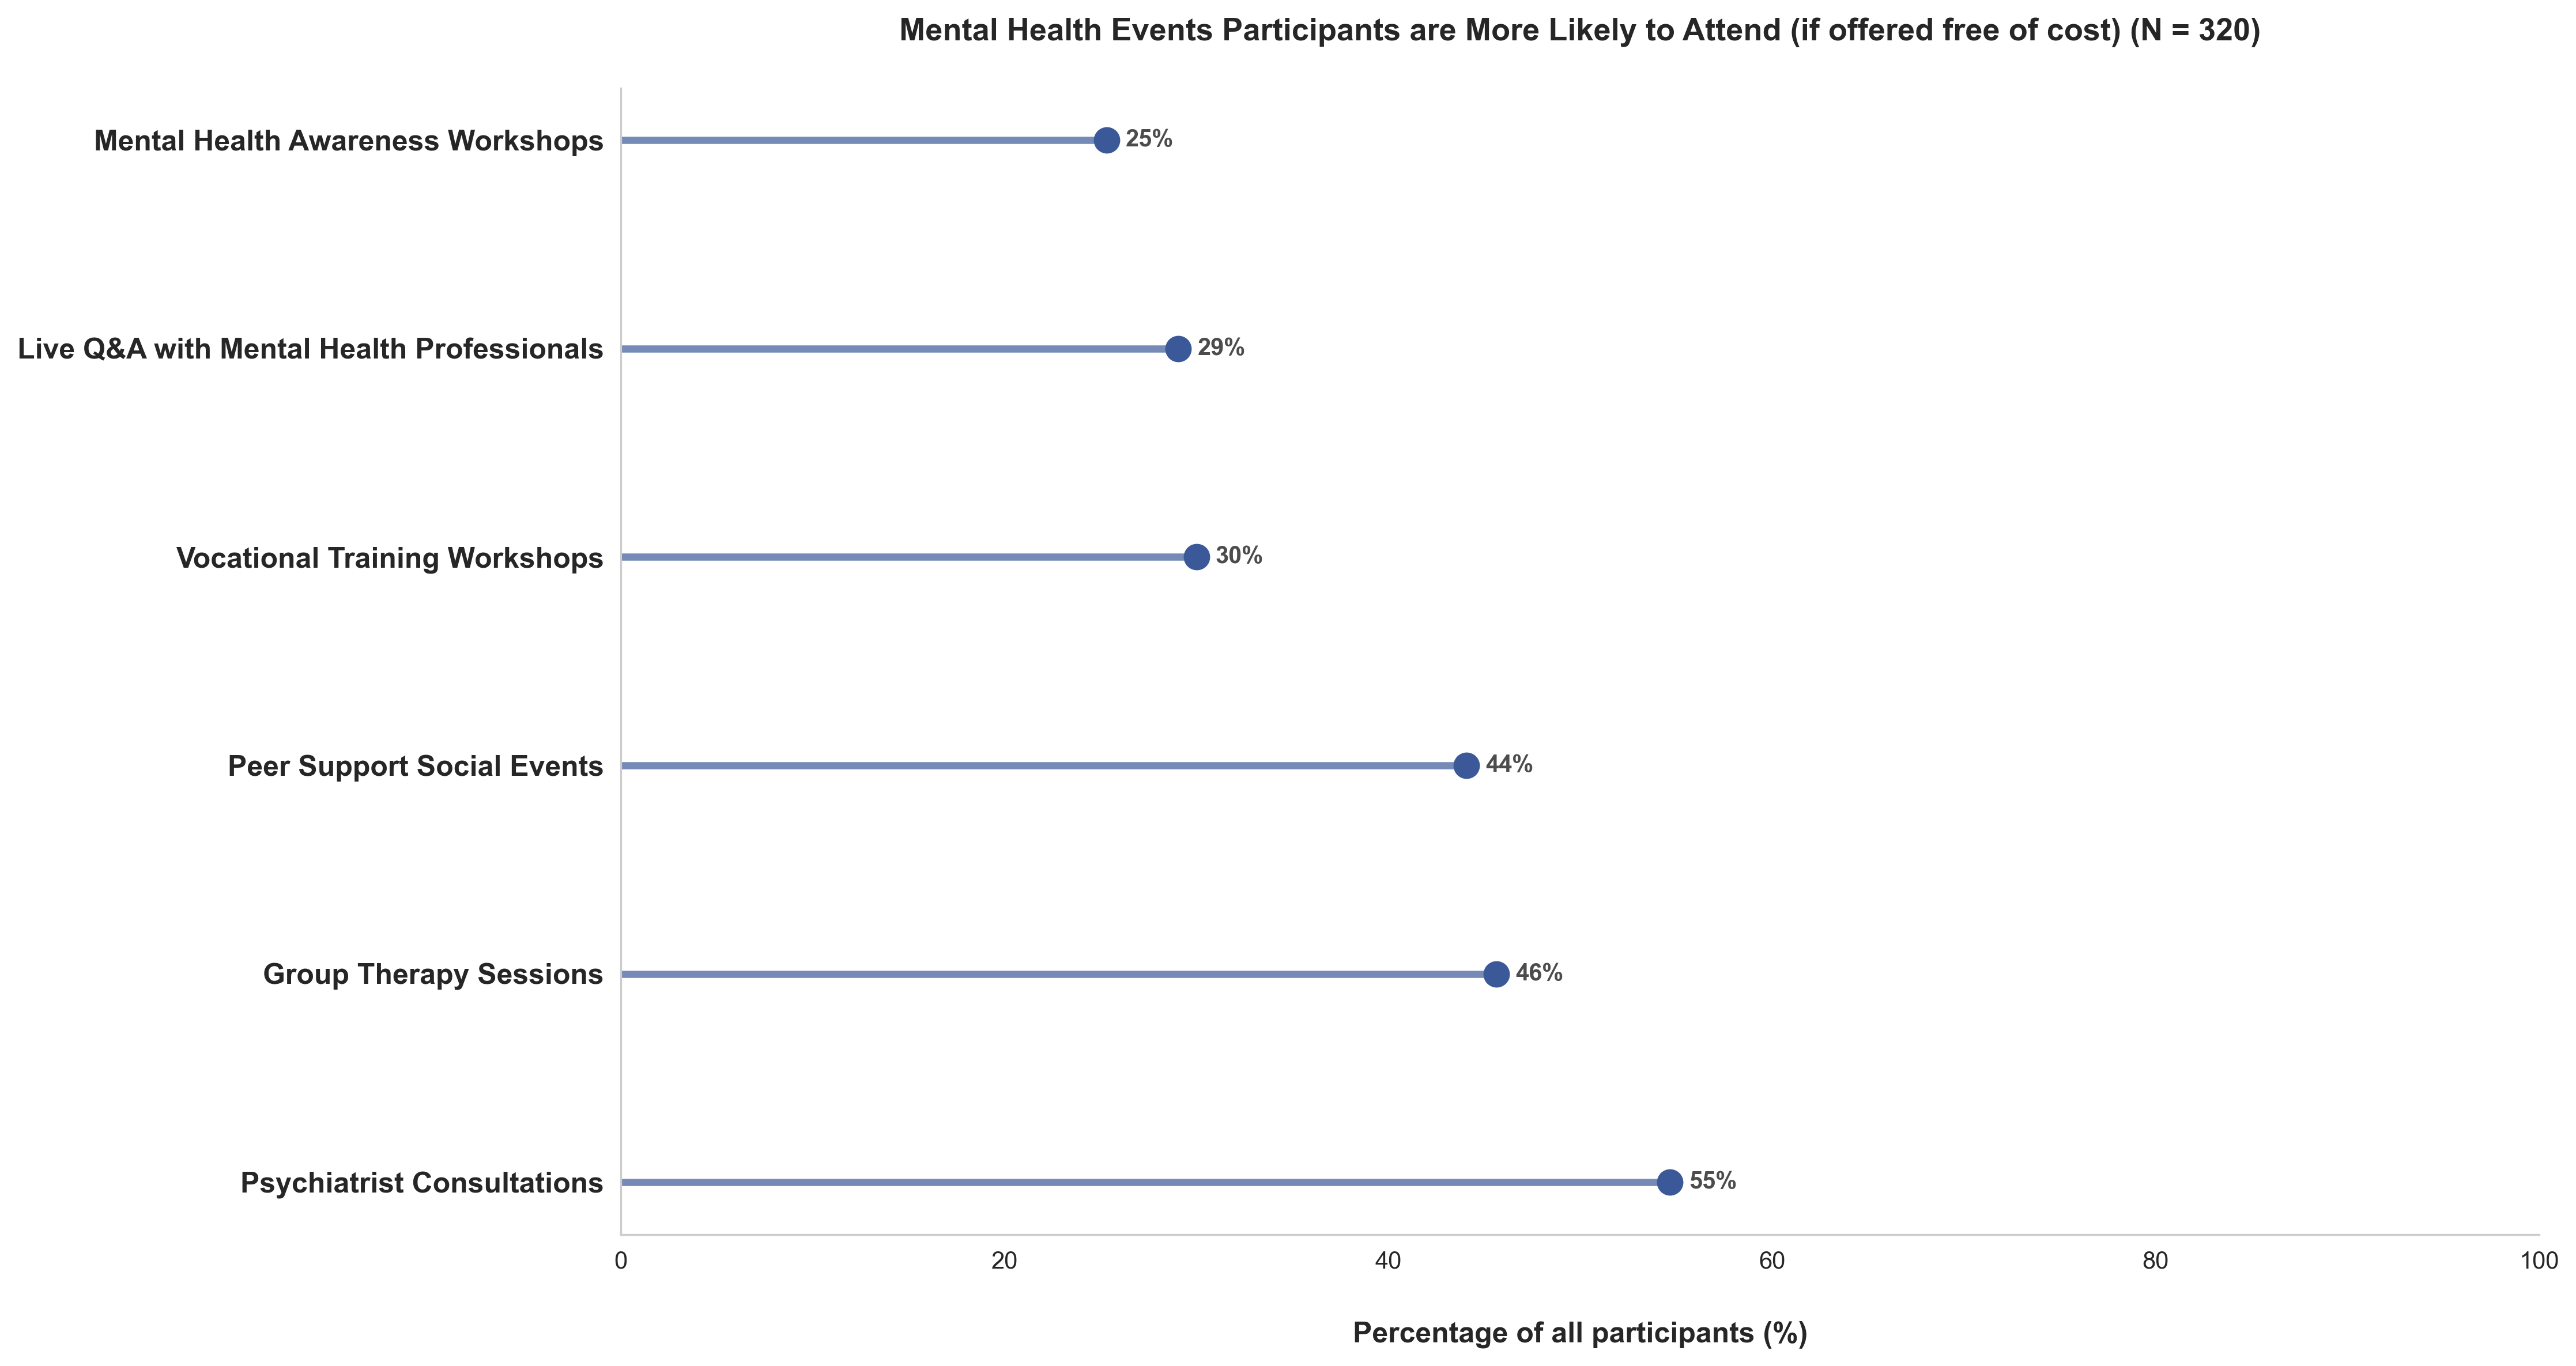

In [ ]:
event_percentages = stigma[event_related_cols].mean() * 100
event_percentages = pd.DataFrame(
    {
        "event": event_percentages.index,
        "percentage of total participants": event_percentages.values,
    }
).sort_values(by="percentage of total participants", ascending=False)

y_labels = event_percentages["event"].map(event_map)
y_pos = np.arange(len(event_percentages))

fig, ax = plt.subplots(figsize=(15, 8))
ax.hlines(
    y=y_pos,
    xmin=0,
    xmax=event_percentages["percentage of total participants"],
    color="#3B5998",
    alpha=0.7,
    linewidth=3,
)
ax.plot(
    event_percentages["percentage of total participants"],
    y_pos,
    "o",
    markersize=10,
    color="#3B5998",
)

for index in range(len(event_percentages)):
    x_value = event_percentages["percentage of total participants"].iloc[index]
    y_position = y_pos[index]
    ax.text(
        x_value + 1,
        y_position,
        f"{x_value:.0f}%",
        va="center",
        fontsize=10,
        fontweight="bold",
        color="black",
        alpha=0.7,
    )

ax.set_yticks(y_pos)
ax.set_yticklabels(y_labels, fontweight="bold", fontsize=12)
ax.set_xlabel(
    "Percentage of all participants (%)", fontsize=12, fontweight="bold", labelpad=20
)
ax.set_ylabel("")
ax.set_title(
    "Mental Health Events Participants are More Likely to Attend (if offered free of cost) (N = 320)",
    fontweight="bold",
    fontsize=13,
    pad=20,
)
ax.grid(visible=False)
ax.set_xlim(0, 100)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

### **Co-occurrences in Barrier & Mental Illness Impacts**

**For example, did participants who were distrustful of mental health providers also report not believing in treatment effectiveness?
Were participants who experienced more stigma more likely to also report acts of self-harm?**

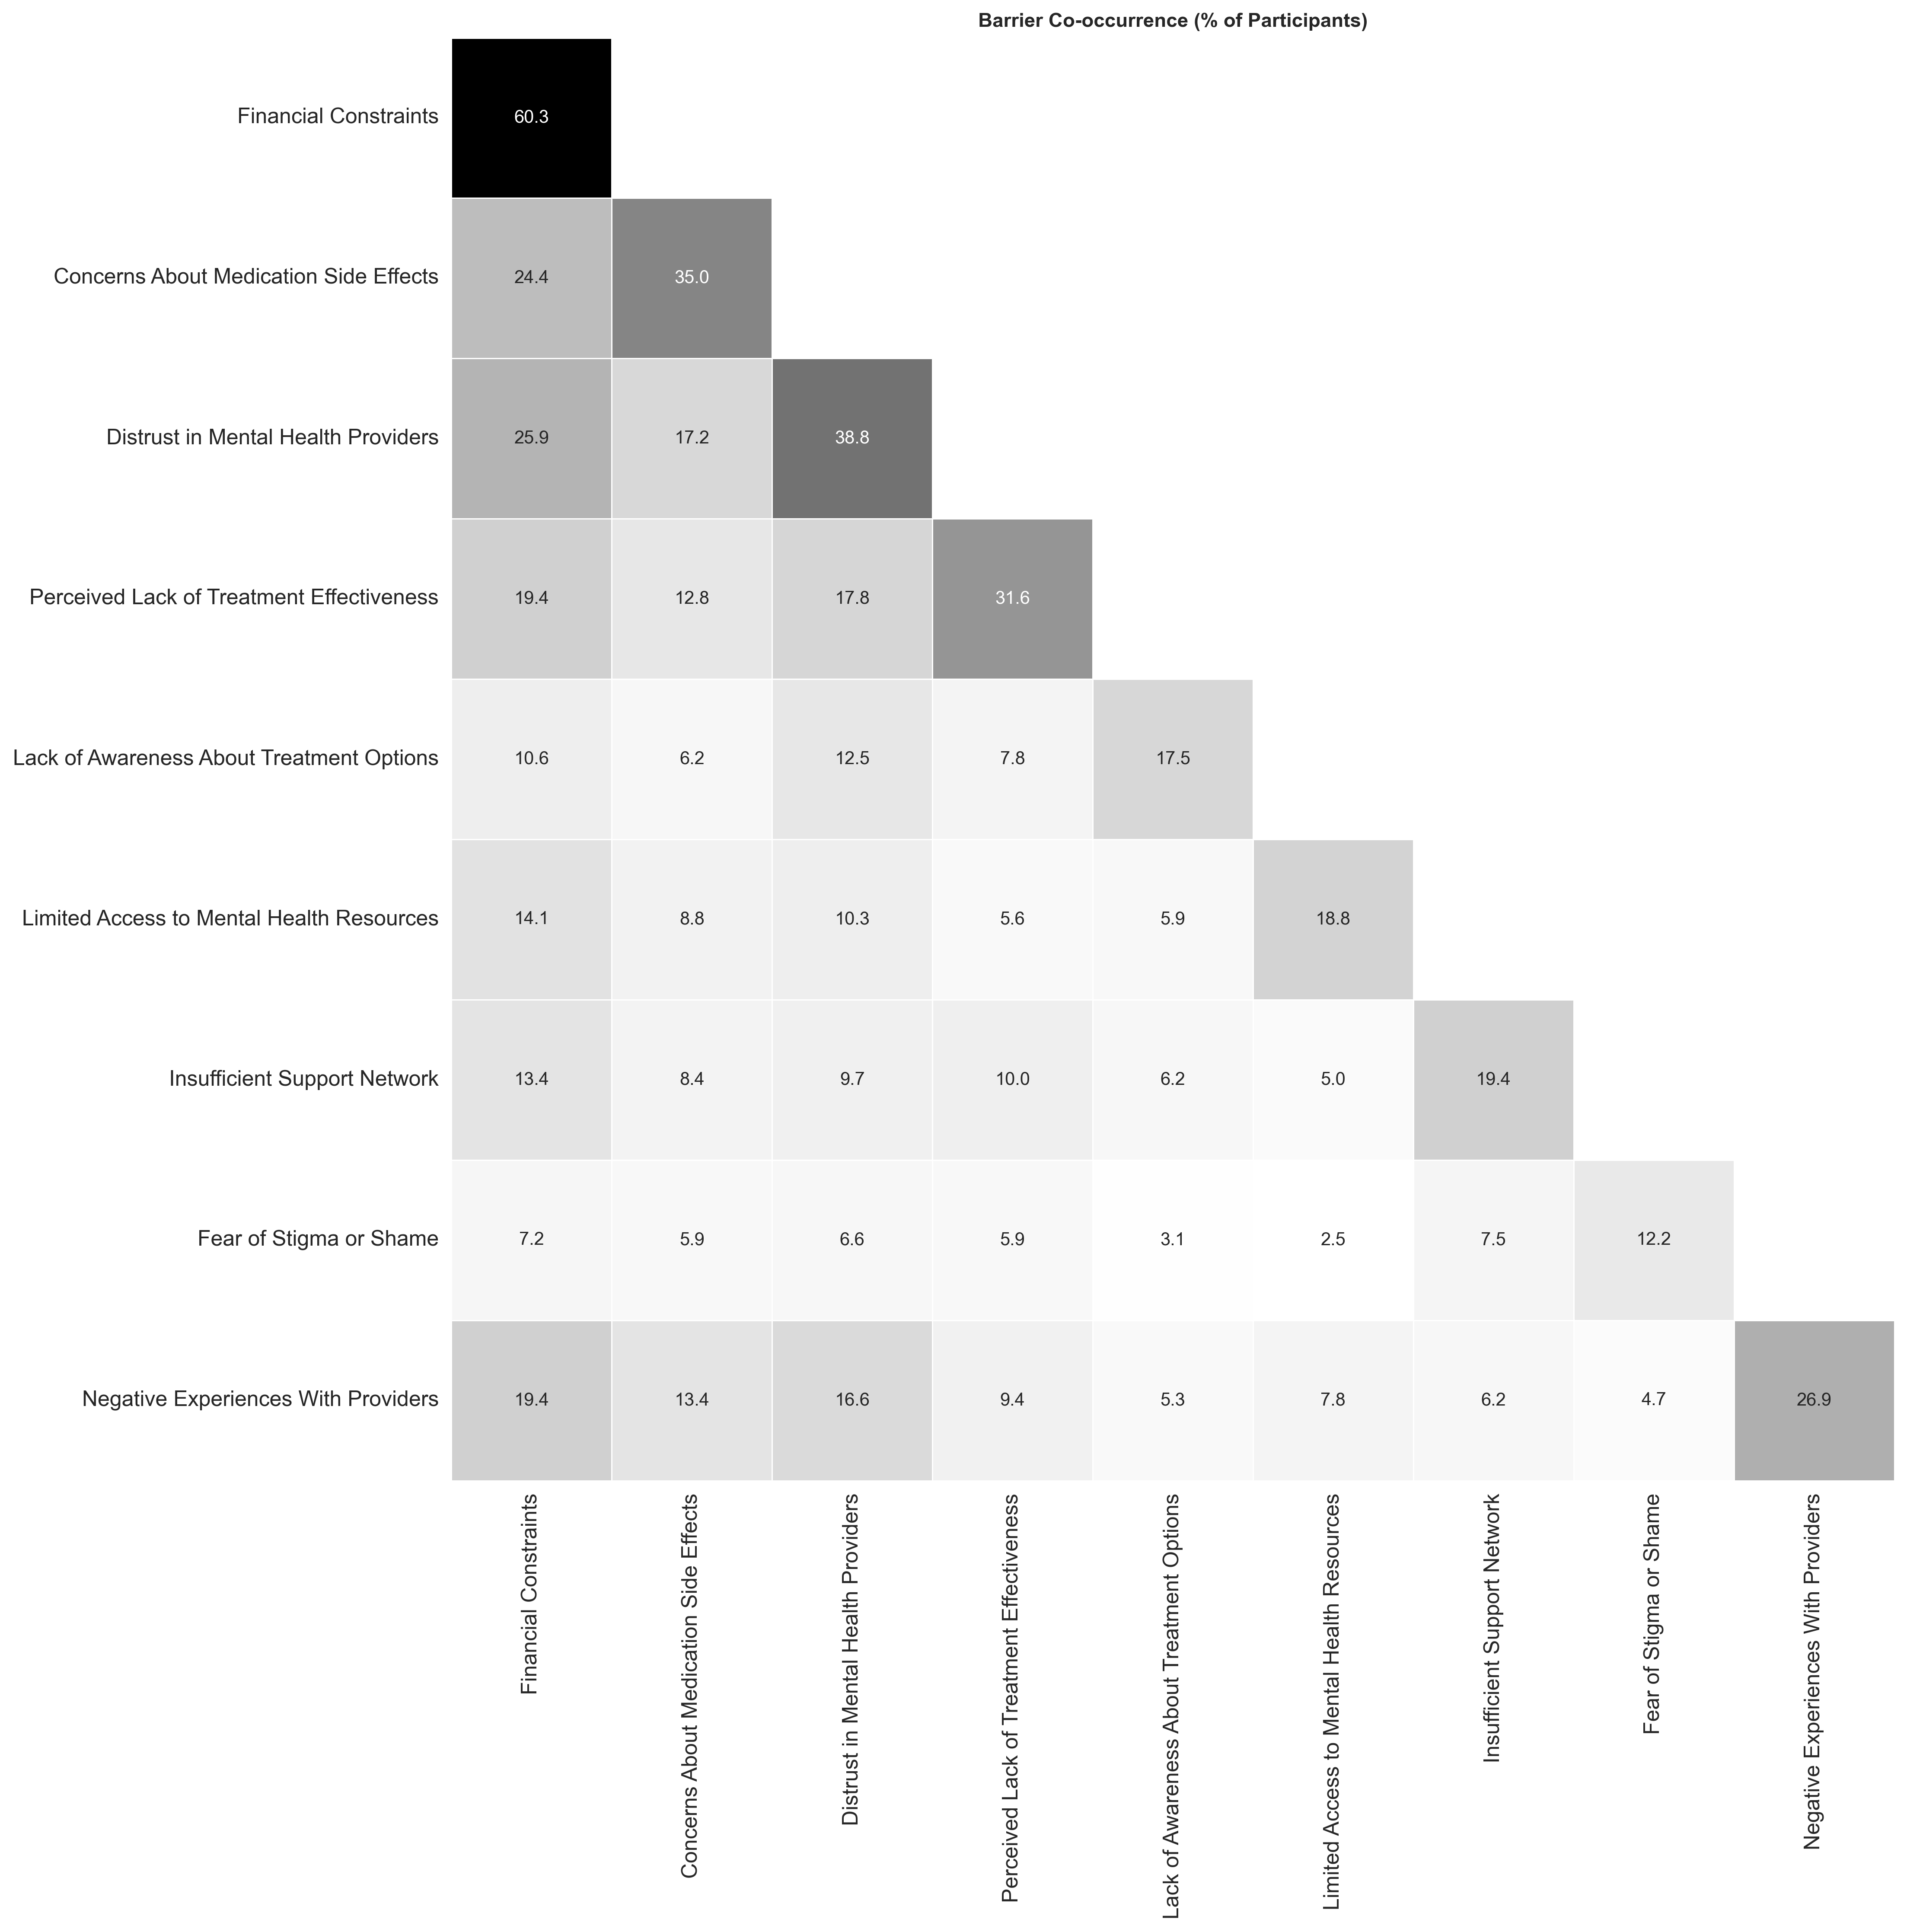

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
mask = np.triu(np.ones_like(co_occurrence, dtype=bool), k=1)
labels = [treatment_label_map[col] for col in co_occurrence.columns]
sns.heatmap(
    co_occurrence,
    mask=mask,
    annot=True,
    fmt=".1f",
    cmap="Grays",
    cbar=False,
    xticklabels=labels,
    yticklabels=labels,
    linewidths=0.7,
    square=True,
)
plt.title("Barrier Co-occurrence (% of Participants)", fontsize=11, fontweight="bold")
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel("")
plt.ylabel("")
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
results = []
for barrier1, barrier2 in itertools.combinations(treatment_related_cols, 2):
    result = test_barrier_association(stigma, barrier1, barrier2)
    results.append(
        {
            "Barrier 1": treatment_label_map[barrier1],
            "Barrier 2": treatment_label_map[barrier2],
            "Chi2": result["chi2"],
            "P-value": result["p_value"],
            "Phi": result["phi"],
            "Significant": result["significant"],
        }
    )

significance_df = pd.DataFrame(results).sort_values("P-value")

print("Most Significant Barrier Coccurences (p < 0.05):")
print("=" * 60)

significant_pairs = significance_df[significance_df["Significant"]]
for _, row in significant_pairs.head(10).iterrows():
    print(f"{row['Barrier 1']} ↔ {row['Barrier 2']}")
    print(f"  Chi² = {row['Chi2']:.2f}, p = {row['P-value']:.4f}, φ = {row['Phi']:.3f}")
    print()

Most Significant Barrier Coccurences (p < 0.05):
Insufficient Support Network ↔ Fear of Stigma or Shame
  Chi² = 47.52, p = 0.0000, φ = 0.385

Distrust in Mental Health Providers ↔ Lack of Awareness About Treatment Options
  Chi² = 28.89, p = 0.0000, φ = 0.300

Distrust in Mental Health Providers ↔ Negative Experiences With Providers
  Chi² = 24.63, p = 0.0000, φ = 0.277

Distrust in Mental Health Providers ↔ Perceived Lack of Treatment Effectiveness
  Chi² = 18.38, p = 0.0000, φ = 0.240

Perceived Lack of Treatment Effectiveness ↔ Insufficient Support Network
  Chi² = 13.18, p = 0.0003, φ = 0.203

Concerns About Medication Side Effects ↔ Negative Experiences With Providers
  Chi² = 10.75, p = 0.0010, φ = 0.183

Lack of Awareness About Treatment Options ↔ Insufficient Support Network
  Chi² = 10.37, p = 0.0013, φ = 0.180

Lack of Awareness About Treatment Options ↔ Limited Access to Mental Health Resources
  Chi² = 9.09, p = 0.0026, φ = 0.169

Distrust in Mental Health Providers ↔ Limi

In [85]:
illness_barriers = stigma[illness_related_cols]
illness_co_occurrence = (
    (illness_barriers.T @ illness_barriers) / len(illness_barriers) * 100
)


illness_results = []
for barrier1, barrier2 in itertools.combinations(illness_related_cols, 2):
    result = test_barrier_association(stigma, barrier1, barrier2)
    illness_results.append(
        {
            "Impact 1": illness_impact_map[barrier1],
            "Impact 2": illness_impact_map[barrier2],
            "Chi2": result["chi2"],
            "P-value": result["p_value"],
            "Phi": result["phi"],
            "Significant": result["significant"],
        }
    )

illness_significance_df = pd.DataFrame(illness_results).sort_values("P-value")

print("Most Significant Illness Impact Co-occurrences (p < 0.05):")
print("=" * 60)
significant_illness_pairs = illness_significance_df[
    illness_significance_df["Significant"]
]
for _, row in significant_illness_pairs.head(10).iterrows():
    print(f"{row['Impact 1']} ↔ {row['Impact 2']}")
    print(f"  Chi² = {row['Chi2']:.2f}, p = {row['P-value']:.4f}, φ = {row['Phi']:.3f}")
    print()

Most Significant Illness Impact Co-occurrences (p < 0.05):
Self-Harm Thoughts ↔ Acts of Self-Harm
  Chi² = 71.71, p = 0.0000, φ = 0.473

Workplace Discrimination ↔ Experienced Humiliation
  Chi² = 54.99, p = 0.0000, φ = 0.415

Work Performance Issues ↔ Self-Harm Thoughts
  Chi² = 52.06, p = 0.0000, φ = 0.403

Self-Harm Thoughts ↔ Relationship Struggles
  Chi² = 43.22, p = 0.0000, φ = 0.367

Workplace Discrimination ↔ Acts of Self-Harm
  Chi² = 39.27, p = 0.0000, φ = 0.350

Acts of Self-Harm ↔ Experienced Humiliation
  Chi² = 27.89, p = 0.0000, φ = 0.295

Acts of Self-Harm ↔ Relationship Struggles
  Chi² = 25.24, p = 0.0000, φ = 0.281

Work Performance Issues ↔ Acts of Self-Harm
  Chi² = 19.35, p = 0.0000, φ = 0.246

Self-Harm Thoughts ↔ Experienced Humiliation
  Chi² = 16.93, p = 0.0000, φ = 0.230

Workplace Discrimination ↔ Self-Harm Thoughts
  Chi² = 16.91, p = 0.0000, φ = 0.230



### **Participants Hospitalization Experiences**

In [86]:
stigma[stigma["hospitalization-experience"].notna()][
    ["diagnosis", "hospitalization-experience"]
]

diagnosis                         hospitalization-experience
12               multiple  بستری اول سال ۹۵ بیمارستان الزهرا اصفهان بخش ر...
101              multiple  مزخرف ترین روز های زندگیم بود\nبسیار کادر درما...
113              multiple  من به مدت یک روز خارج از ایران در بیمارستان بس...
114           undiagnosed               یک ماه بستری بودم و رفتارشون خوب بود
128         mood_disorder  خواهرم خیلی ناراضی بود..‌اون همدلی و باهاشون ن...
133         mood_disorder                                              متوسط
144         mood_disorder                                           خیلی خوب
156         mood_disorder                                   یک هفته و تقریبا
175  personality_disorder  دو هفته بیمارستان سانتر مسمومیت که بیهوش بودم\...
188              multiple  تجربه ای که یکی از اعضای خانوادم داشت: نحوه بر...
224     psychotic_illness  چندبار به مدت یک الی دوهفته بستری بودم اما محی...
229  personality_disorder  اصلا روان‌درمانی نداشتیم فقط بهمون دارو می داد...
233           undiagnosed                                   خیلی مهربان بودن
242                 carer  بیمارستان امام حسین کادر رفتار متوسط\nنگهبانان...
257              multiple  به دلیل فاصله گرفتن از آدم‌ها، نبودن در معرض د...
263     psychotic_illness  خیلی بد برخورد میکردن و بیشتر میشد دید که ازم ...
269                   ocd                                                 ..
271         mood_disorder  رسیدگی کادر خوب بود، اما محیطش ادمو افسرده تر ...
287           undiagnosed  پسرعمو بستری شده و هرچند وقت یک بار شوک مغزی م...
292         mood_disorder  به مدت ۱۰ روز، بخش کادر درمان اوکی بود ولی امک...
302         mood_disorder  دیدن بیماران دیگه حس بسیار بدی داشت و اصلا به ...
319         mood_disorder          امکان ملاقات خیلی کم بود و اذیت کننده بود

In [87]:
hospitalized = stigma[stigma["hospitalization-experience"].notna()][
    ["diagnosis", "hospitalization-experience"]
].copy()

In [88]:
for idx, row in hospitalized.iterrows():
    print(f"index:{idx}")
    print(f"Diagnosis: {row['diagnosis']}")
    print(f"Experience: {row['hospitalization-experience']}")
    print("-" * 80)

index:12
Diagnosis: multiple
Experience: بستری اول سال ۹۵ بیمارستان الزهرا اصفهان بخش روانپزشکی کودک و نوجوان : امکانات بخش بسیار کم بود و بخش خیلی کوچک بود به خصوص برای کودک و نوجوان. تجویز شوک غیرضروری برای همه ی بچه ها وجود داشت. برخورد و رسیدگی کادر درمان قابل قبول بود. 

سال ۹۸، ۹۹،، ۱۴۰۱ : بیمارستان روانپزشکی ایرانیان ، نحوه برخورد و رسیدگی کادر درمان به خصوص پرستاران و روانشناسان بسیار عالی بود و بسیار در تجربه بهبود بحران خودکشی من تاثیرگذار بود. امکانات و فضای بخش خیلی خوب بود کاردرمانی داشت فضای سبز پویا داشت بوفه خوراکی داشت که همه اینها به استراحت و بهبود کمک میکرد. برخلاف سایر بخشها دراین بیمارستان امکان استفاده از وسایل نقاشی، کتاب و... رو شخصی داشتم که خیلی به حس امنیت من(درحالی ک از همه دنیا حس ناامنی داشتم)  کمک کرد.  دو دوره اول روانپزشک خوبی داشتم که وقت کافی برای صحبت و مصاحبه با من میگذاشت اما در دوره سوم روانپزشک بدون اجازه من و خانواده ام تجویز شوک کرده بود که درنهایت به سلامتم آسیب زد.

سال۱۴۰۰ بیمارستان دل آرام سینا: امکانات و فضای بیمارستان خیلی محدود و دلگیر 

In [89]:
hospitalized["sentiment"] = None

hospitalized.at[12, "sentiment"] = "Mixed"
hospitalized.at[101, "sentiment"] = "Negative"
hospitalized.at[113, "sentiment"] = "Negative"
hospitalized.at[114, "sentiment"] = "Positive"
hospitalized.at[128, "sentiment"] = "Negative"
hospitalized.at[133, "sentiment"] = "Mixed"
hospitalized.at[144, "sentiment"] = "Positive"
hospitalized.at[175, "sentiment"] = "Mixed"
hospitalized.at[188, "sentiment"] = "Mixed"
hospitalized.at[224, "sentiment"] = "Negative"
hospitalized.at[229, "sentiment"] = "Mixed"
hospitalized.at[233, "sentiment"] = "Positive"
hospitalized.at[242, "sentiment"] = "Mixed"
hospitalized.at[257, "sentiment"] = "Mixed"
hospitalized.at[263, "sentiment"] = "Negative"
hospitalized.at[271, "sentiment"] = "Mixed"
hospitalized.at[292, "sentiment"] = "Negative"
hospitalized.at[302, "sentiment"] = "Negative"
hospitalized.at[319, "sentiment"] = "Negative"

hospitalized


diagnosis                         hospitalization-experience  \
12               multiple  بستری اول سال ۹۵ بیمارستان الزهرا اصفهان بخش ر...   
101              multiple  مزخرف ترین روز های زندگیم بود\nبسیار کادر درما...   
113              multiple  من به مدت یک روز خارج از ایران در بیمارستان بس...   
114           undiagnosed               یک ماه بستری بودم و رفتارشون خوب بود   
128         mood_disorder  خواهرم خیلی ناراضی بود..‌اون همدلی و باهاشون ن...   
133         mood_disorder                                              متوسط   
144         mood_disorder                                           خیلی خوب   
156         mood_disorder                                   یک هفته و تقریبا   
175  personality_disorder  دو هفته بیمارستان سانتر مسمومیت که بیهوش بودم\...   
188              multiple  تجربه ای که یکی از اعضای خانوادم داشت: نحوه بر...   
224     psychotic_illness  چندبار به مدت یک الی دوهفته بستری بودم اما محی...   
229  personality_disorder  اصلا روان‌درمانی نداشتیم فقط بهمون دارو می داد...   
233           undiagnosed                                   خیلی مهربان بودن   
242                 carer  بیمارستان امام حسین کادر رفتار متوسط\nنگهبانان...   
257              multiple  به دلیل فاصله گرفتن از آدم‌ها، نبودن در معرض د...   
263     psychotic_illness  خیلی بد برخورد میکردن و بیشتر میشد دید که ازم ...   
269                   ocd                                                 ..   
271         mood_disorder  رسیدگی کادر خوب بود، اما محیطش ادمو افسرده تر ...   
287           undiagnosed  پسرعمو بستری شده و هرچند وقت یک بار شوک مغزی م...   
292         mood_disorder  به مدت ۱۰ روز، بخش کادر درمان اوکی بود ولی امک...   
302         mood_disorder  دیدن بیماران دیگه حس بسیار بدی داشت و اصلا به ...   
319         mood_disorder          امکان ملاقات خیلی کم بود و اذیت کننده بود   

    sentiment  
12      Mixed  
101  Negative  
113  Negative  
114  Positive  
128  Negative  
133     Mixed  
144  Positive  
156      None  
175     Mixed  
188     Mixed  
224  Negative  
229     Mixed  
233  Positive  
242     Mixed  
257     Mixed  
263  Negative  
269      None  
271     Mixed  
287      None  
292  Negative  
302  Negative  
319  Negative

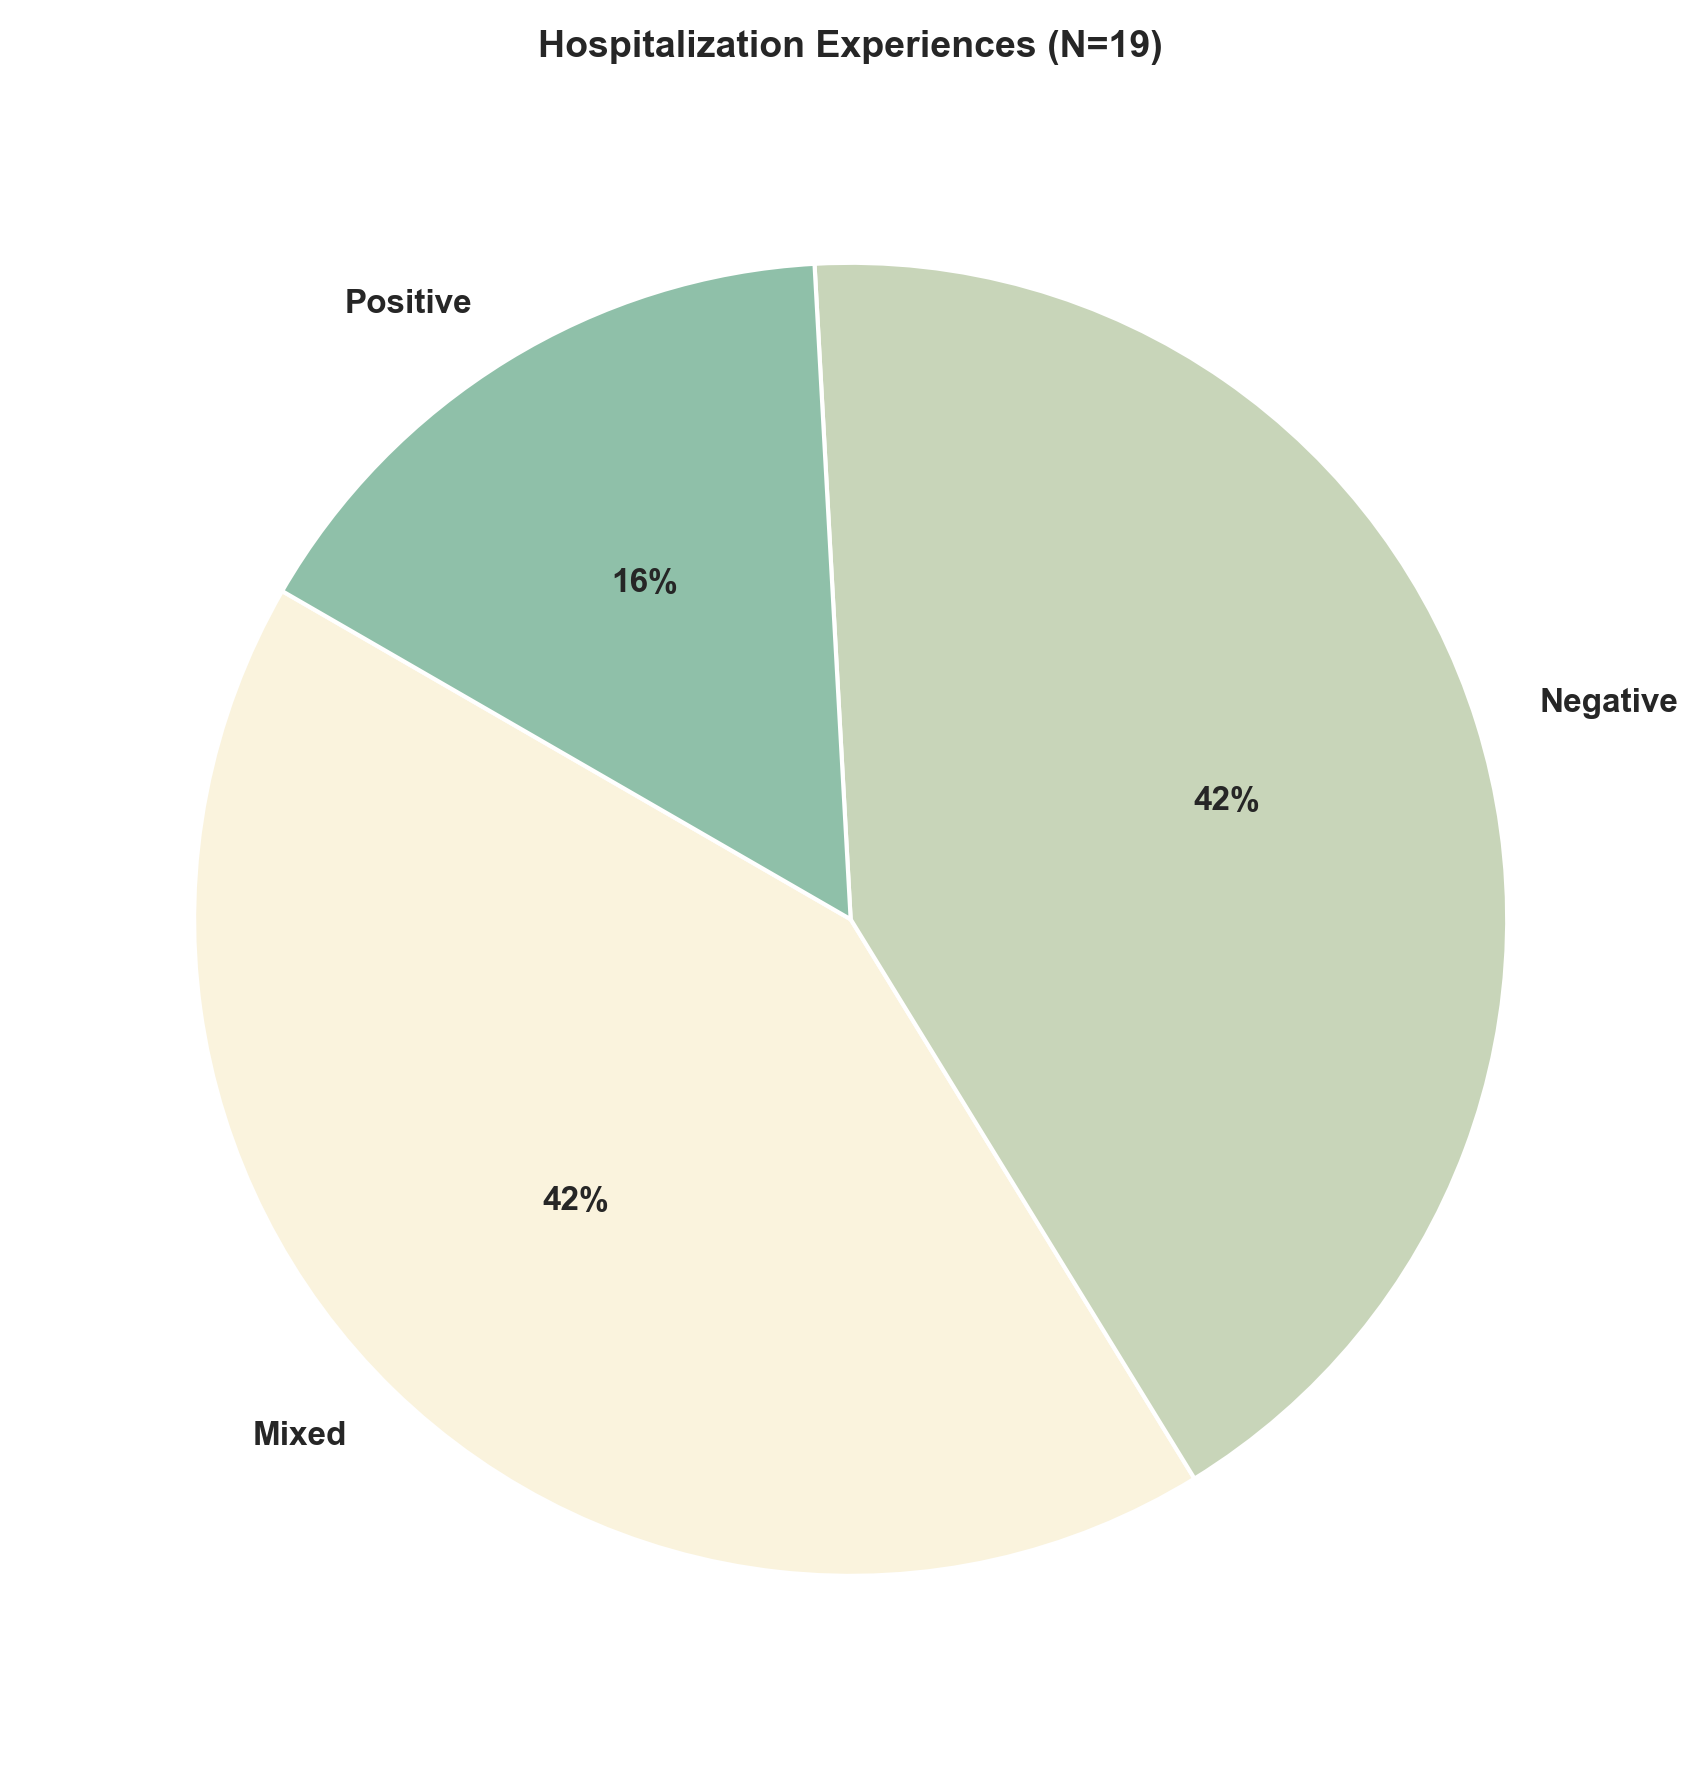

In [90]:
hospitalized_sentiment_counts = hospitalized["sentiment"].value_counts()
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    hospitalized_sentiment_counts,
    labels=hospitalized_sentiment_counts.index,
    autopct="%1.0f%%",
    colors=["#faf3dd", "#c8d5b9", "#8fc0a9"],
    startangle=150,
    textprops={"fontsize": 8, "fontweight": "bold"},
)
ax.set_title(
    "Hospitalization Experiences (N=19)", fontsize=9, fontweight="bold", pad=10
)
plt.tight_layout()
plt.show()
